In [1]:
import os
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn import svm
import pickle
from nltk.corpus import stopwords
import matplotlib.pyplot as plt

In [4]:
# prepare dataset

In [3]:
anti_accounts_path = r'E:\Twitter_data\BASE_HUBS\anti_scientific_data_2'
hand_picked_new_anti_hubs_path = r'E:\Twitter_data\BASE_HUBS\hand_picked_new_anti_hubs'

pro_accounts_path = r'E:\Twitter_data\BASE_HUBS\pro_scientific_data_2'
hand_picked_new_pro_hubs_path = r'E:\Twitter_data\BASE_HUBS\hand_picked_new_pro_hubs'

neutral_accounts_path = r'E:\Twitter_data\BASE_HUBS\neutral_data_2'

In [4]:
def read_df_from_files(base_anti_accounts_path, new_anti_accounts_path, base_pro_accounts_path, new_pro_accounts_path, 
                       base_neutral_accounts_path, number_of_last_tweets):
    
    # BASE ANTI
    base_anti_accounts = os.listdir(base_anti_accounts_path)
    
    tweets_dfs = [] 
    for account in base_anti_accounts:
        acc_path = os.path.join(base_anti_accounts_path, account)
        try: 
            print(os.path.join(acc_path, 'tweets.json'))
            df = pd.read_json(os.path.join(acc_path, 'tweets.json'))
            df['account'] = account
            df = df.head(number_of_last_tweets)
            tweets_dfs.append(df)
        except ValueError:
            continue
    
    # NEW ANTI
    new_anti_accounts = os.listdir(new_anti_accounts_path)        
    
    for account in new_anti_accounts:
        acc_path = os.path.join(new_anti_accounts_path, account)
        try: 
            print(os.path.join(acc_path, 'tweets.json'))
            df = pd.read_json(os.path.join(acc_path, 'tweets.json'))
            df['account'] = account
            df = df.head(number_of_last_tweets)
            tweets_dfs.append(df)
        except ValueError:
            continue

    anti_df = pd.concat(tweets_dfs, ignore_index=True)
    anti_df['class'] = 0


    # BASE PRO
    base_pro_accounts = os.listdir(base_pro_accounts_path)
    
    tweets_dfs = []
    for account in base_pro_accounts:
        acc_path = os.path.join(base_pro_accounts_path, account)
        try: 
            print(os.path.join(acc_path, 'tweets.json'))
            df = pd.read_json(os.path.join(acc_path, 'tweets.json'))
            df['account'] = account
            df = df.head(number_of_last_tweets)
            tweets_dfs.append(df)
        except ValueError:
            continue

    # NEW PRO
    new_pro_accounts = os.listdir(new_pro_accounts_path)
    
    for account in new_pro_accounts:
        acc_path = os.path.join(new_pro_accounts_path, account)
        try: 
            print(os.path.join(acc_path, 'tweets.json'))
            df = pd.read_json(os.path.join(acc_path, 'tweets.json'))
            df['account'] = account
            df = df.head(number_of_last_tweets)
            tweets_dfs.append(df)
        except ValueError:
            continue

    pro_df = pd.concat(tweets_dfs, ignore_index=True)
    pro_df['class'] = 2


    # BASE NEUTRAL
    base_neutral_accounts = os.listdir(base_neutral_accounts_path)
    
    tweets_dfs = []
    for account in base_neutral_accounts:
        acc_path = os.path.join(base_neutral_accounts_path, account)
        try: 
            print(os.path.join(acc_path, 'tweets.json'))
            df = pd.read_json(os.path.join(acc_path, 'tweets.json'))
            df['account'] = account
            df = df.head(number_of_last_tweets)
            tweets_dfs.append(df)
        except ValueError:
            continue

    neutral_df = pd.concat(tweets_dfs, ignore_index=True)
    neutral_df['class'] = 1

    df = pd.concat([anti_df, pro_df, neutral_df], ignore_index=True)
    
    return df 

In [5]:
# MAX IS 3200 LAST TWEETS (TWITTER API LIMIT)

df_100 = read_df_from_files(anti_accounts_path, hand_picked_new_anti_hubs_path, pro_accounts_path, hand_picked_new_pro_hubs_path, neutral_accounts_path, 100)
df_200 = read_df_from_files(anti_accounts_path, hand_picked_new_anti_hubs_path, pro_accounts_path, hand_picked_new_pro_hubs_path, neutral_accounts_path, 200)
df_500 = read_df_from_files(anti_accounts_path, hand_picked_new_anti_hubs_path, pro_accounts_path, hand_picked_new_pro_hubs_path, neutral_accounts_path, 500)
df_600 = read_df_from_files(anti_accounts_path, hand_picked_new_anti_hubs_path, pro_accounts_path, hand_picked_new_pro_hubs_path, neutral_accounts_path, 600)
df_700 = read_df_from_files(anti_accounts_path, hand_picked_new_anti_hubs_path, pro_accounts_path, hand_picked_new_pro_hubs_path, neutral_accounts_path, 700)
df_800 = read_df_from_files(anti_accounts_path, hand_picked_new_anti_hubs_path, pro_accounts_path, hand_picked_new_pro_hubs_path, neutral_accounts_path, 800)
df_900 = read_df_from_files(anti_accounts_path, hand_picked_new_anti_hubs_path, pro_accounts_path, hand_picked_new_pro_hubs_path, neutral_accounts_path, 900)
df_1000 = read_df_from_files(anti_accounts_path, hand_picked_new_anti_hubs_path, pro_accounts_path, hand_picked_new_pro_hubs_path, neutral_accounts_path, 1000)
df_2000 = read_df_from_files(anti_accounts_path, hand_picked_new_anti_hubs_path, pro_accounts_path, hand_picked_new_pro_hubs_path, neutral_accounts_path, 2000)
df_3000 = read_df_from_files(anti_accounts_path, hand_picked_new_anti_hubs_path, pro_accounts_path, hand_picked_new_pro_hubs_path, neutral_accounts_path, 3000)
df_3500 = read_df_from_files(anti_accounts_path, hand_picked_new_anti_hubs_path, pro_accounts_path, hand_picked_new_pro_hubs_path, neutral_accounts_path, 3500)

E:\Twitter_data\BASE_HUBS\anti_scientific_data_2\@5gAwareness\tweets.json
E:\Twitter_data\BASE_HUBS\anti_scientific_data_2\@5GAwarenessNow\tweets.json
E:\Twitter_data\BASE_HUBS\anti_scientific_data_2\@5gDangers\tweets.json
E:\Twitter_data\BASE_HUBS\anti_scientific_data_2\@AlternMedicine1\tweets.json
E:\Twitter_data\BASE_HUBS\anti_scientific_data_2\@AMGuide\tweets.json
E:\Twitter_data\BASE_HUBS\anti_scientific_data_2\@Anastas32451695\tweets.json
E:\Twitter_data\BASE_HUBS\anti_scientific_data_2\@AncestralApoth\tweets.json
E:\Twitter_data\BASE_HUBS\anti_scientific_data_2\@AnnleeElisha\tweets.json
E:\Twitter_data\BASE_HUBS\anti_scientific_data_2\@avoiceforchoice\tweets.json
E:\Twitter_data\BASE_HUBS\anti_scientific_data_2\@BusyDrT\tweets.json
E:\Twitter_data\BASE_HUBS\anti_scientific_data_2\@CAchemtrails\tweets.json
E:\Twitter_data\BASE_HUBS\anti_scientific_data_2\@CaliVaxChoice\tweets.json
E:\Twitter_data\BASE_HUBS\anti_scientific_data_2\@Canoe_Glider\tweets.json
E:\Twitter_data\BASE_HUBS

E:\Twitter_data\BASE_HUBS\anti_scientific_data_2\@vaxxed2\tweets.json
E:\Twitter_data\BASE_HUBS\anti_scientific_data_2\@VitalityOnline\tweets.json
E:\Twitter_data\BASE_HUBS\anti_scientific_data_2\@Vomit911\tweets.json
E:\Twitter_data\BASE_HUBS\anti_scientific_data_2\@wanderinganimal\tweets.json
E:\Twitter_data\BASE_HUBS\anti_scientific_data_2\@wddty\tweets.json
E:\Twitter_data\BASE_HUBS\anti_scientific_data_2\@WeWillBeFree82\tweets.json
E:\Twitter_data\BASE_HUBS\anti_scientific_data_2\@WorldwideHealth\tweets.json
E:\Twitter_data\BASE_HUBS\anti_scientific_data_2\@yattypat\tweets.json
E:\Twitter_data\BASE_HUBS\anti_scientific_data_2\@YouthAgainst5G\tweets.json
E:\Twitter_data\BASE_HUBS\anti_scientific_data_2\@_CSHD\tweets.json
E:\Twitter_data\BASE_HUBS\anti_scientific_data_2\TNaturalHealing\tweets.json
E:\Twitter_data\BASE_HUBS\hand_picked_new_anti_hubs\82jsmith\tweets.json
E:\Twitter_data\BASE_HUBS\hand_picked_new_anti_hubs\apiscesdream\tweets.json
E:\Twitter_data\BASE_HUBS\hand_picked_

E:\Twitter_data\BASE_HUBS\pro_scientific_data_2\@starstryder\tweets.json
E:\Twitter_data\BASE_HUBS\pro_scientific_data_2\@timberners_lee\tweets.json
E:\Twitter_data\BASE_HUBS\pro_scientific_data_2\@vaughanbell\tweets.json
E:\Twitter_data\BASE_HUBS\hand_picked_new_pro_hubs\AdamRutherford\tweets.json
E:\Twitter_data\BASE_HUBS\hand_picked_new_pro_hubs\aetiology\tweets.json
E:\Twitter_data\BASE_HUBS\hand_picked_new_pro_hubs\alexismadrigal\tweets.json
E:\Twitter_data\BASE_HUBS\hand_picked_new_pro_hubs\amy_harmon\tweets.json
E:\Twitter_data\BASE_HUBS\hand_picked_new_pro_hubs\AstroKatie\tweets.json
E:\Twitter_data\BASE_HUBS\hand_picked_new_pro_hubs\BeeBrookshire\tweets.json
E:\Twitter_data\BASE_HUBS\hand_picked_new_pro_hubs\BillGates\tweets.json
E:\Twitter_data\BASE_HUBS\hand_picked_new_pro_hubs\BillNye\tweets.json
E:\Twitter_data\BASE_HUBS\hand_picked_new_pro_hubs\bmaher\tweets.json
E:\Twitter_data\BASE_HUBS\hand_picked_new_pro_hubs\carlzimmer\tweets.json
E:\Twitter_data\BASE_HUBS\hand_picke

E:\Twitter_data\BASE_HUBS\neutral_data_2\CraigyFerg\tweets.json
E:\Twitter_data\BASE_HUBS\neutral_data_2\Cristiano\tweets.json
E:\Twitter_data\BASE_HUBS\neutral_data_2\crypto\tweets.json
E:\Twitter_data\BASE_HUBS\neutral_data_2\CryptoBoomNews\tweets.json
E:\Twitter_data\BASE_HUBS\neutral_data_2\CryptoGemsCom\tweets.json
E:\Twitter_data\BASE_HUBS\neutral_data_2\CryptoKingBTCc\tweets.json
E:\Twitter_data\BASE_HUBS\neutral_data_2\CryptoTownEU\tweets.json
E:\Twitter_data\BASE_HUBS\neutral_data_2\CryptoWhale\tweets.json
E:\Twitter_data\BASE_HUBS\neutral_data_2\Crypto_Glitch\tweets.json
E:\Twitter_data\BASE_HUBS\neutral_data_2\crypto_goat_\tweets.json
E:\Twitter_data\BASE_HUBS\neutral_data_2\DailyMail\tweets.json
E:\Twitter_data\BASE_HUBS\neutral_data_2\DailyMailUK\tweets.json
E:\Twitter_data\BASE_HUBS\neutral_data_2\DailyMirror\tweets.json
E:\Twitter_data\BASE_HUBS\neutral_data_2\dailymotion\tweets.json
E:\Twitter_data\BASE_HUBS\neutral_data_2\DalaiLama\tweets.json
E:\Twitter_data\BASE_HUBS

E:\Twitter_data\BASE_HUBS\neutral_data_2\NiaNRiley\tweets.json
E:\Twitter_data\BASE_HUBS\neutral_data_2\nickbilton\tweets.json
E:\Twitter_data\BASE_HUBS\neutral_data_2\NickWooster\tweets.json
E:\Twitter_data\BASE_HUBS\neutral_data_2\NorthmanTrader\tweets.json
E:\Twitter_data\BASE_HUBS\neutral_data_2\norvina\tweets.json
E:\Twitter_data\BASE_HUBS\neutral_data_2\nprpolitics\tweets.json
E:\Twitter_data\BASE_HUBS\neutral_data_2\NRA\tweets.json
E:\Twitter_data\BASE_HUBS\neutral_data_2\NRAblog\tweets.json
E:\Twitter_data\BASE_HUBS\neutral_data_2\NylonMag\tweets.json
E:\Twitter_data\BASE_HUBS\neutral_data_2\Oceana\tweets.json
E:\Twitter_data\BASE_HUBS\neutral_data_2\ODELL\tweets.json
E:\Twitter_data\BASE_HUBS\neutral_data_2\officialegf\tweets.json
E:\Twitter_data\BASE_HUBS\neutral_data_2\OfficialHacksaw\tweets.json
E:\Twitter_data\BASE_HUBS\neutral_data_2\officialmcafee\tweets.json
E:\Twitter_data\BASE_HUBS\neutral_data_2\OHMichael\tweets.json
E:\Twitter_data\BASE_HUBS\neutral_data_2\Oipolloi\

E:\Twitter_data\BASE_HUBS\neutral_data_2\zefrank\tweets.json
E:\Twitter_data\BASE_HUBS\neutral_data_2\_NadiaJay_\tweets.json
E:\Twitter_data\BASE_HUBS\anti_scientific_data_2\@5gAwareness\tweets.json
E:\Twitter_data\BASE_HUBS\anti_scientific_data_2\@5GAwarenessNow\tweets.json
E:\Twitter_data\BASE_HUBS\anti_scientific_data_2\@5gDangers\tweets.json
E:\Twitter_data\BASE_HUBS\anti_scientific_data_2\@AlternMedicine1\tweets.json
E:\Twitter_data\BASE_HUBS\anti_scientific_data_2\@AMGuide\tweets.json
E:\Twitter_data\BASE_HUBS\anti_scientific_data_2\@Anastas32451695\tweets.json
E:\Twitter_data\BASE_HUBS\anti_scientific_data_2\@AncestralApoth\tweets.json
E:\Twitter_data\BASE_HUBS\anti_scientific_data_2\@AnnleeElisha\tweets.json
E:\Twitter_data\BASE_HUBS\anti_scientific_data_2\@avoiceforchoice\tweets.json
E:\Twitter_data\BASE_HUBS\anti_scientific_data_2\@BusyDrT\tweets.json
E:\Twitter_data\BASE_HUBS\anti_scientific_data_2\@CAchemtrails\tweets.json
E:\Twitter_data\BASE_HUBS\anti_scientific_data_2\@C

E:\Twitter_data\BASE_HUBS\anti_scientific_data_2\@WorldwideHealth\tweets.json
E:\Twitter_data\BASE_HUBS\anti_scientific_data_2\@yattypat\tweets.json
E:\Twitter_data\BASE_HUBS\anti_scientific_data_2\@YouthAgainst5G\tweets.json
E:\Twitter_data\BASE_HUBS\anti_scientific_data_2\@_CSHD\tweets.json
E:\Twitter_data\BASE_HUBS\anti_scientific_data_2\TNaturalHealing\tweets.json
E:\Twitter_data\BASE_HUBS\hand_picked_new_anti_hubs\82jsmith\tweets.json
E:\Twitter_data\BASE_HUBS\hand_picked_new_anti_hubs\apiscesdream\tweets.json
E:\Twitter_data\BASE_HUBS\hand_picked_new_anti_hubs\Astroidhalo774\tweets.json
E:\Twitter_data\BASE_HUBS\hand_picked_new_anti_hubs\authoralexray\tweets.json
E:\Twitter_data\BASE_HUBS\hand_picked_new_anti_hubs\barmanamar1976\tweets.json
E:\Twitter_data\BASE_HUBS\hand_picked_new_anti_hubs\BBGRichie\tweets.json
E:\Twitter_data\BASE_HUBS\hand_picked_new_anti_hubs\CarlDevitt\tweets.json
E:\Twitter_data\BASE_HUBS\hand_picked_new_anti_hubs\Cernovich\tweets.json
E:\Twitter_data\BASE

E:\Twitter_data\BASE_HUBS\hand_picked_new_pro_hubs\amy_harmon\tweets.json
E:\Twitter_data\BASE_HUBS\hand_picked_new_pro_hubs\AstroKatie\tweets.json
E:\Twitter_data\BASE_HUBS\hand_picked_new_pro_hubs\BeeBrookshire\tweets.json
E:\Twitter_data\BASE_HUBS\hand_picked_new_pro_hubs\BillGates\tweets.json
E:\Twitter_data\BASE_HUBS\hand_picked_new_pro_hubs\BillNye\tweets.json
E:\Twitter_data\BASE_HUBS\hand_picked_new_pro_hubs\bmaher\tweets.json
E:\Twitter_data\BASE_HUBS\hand_picked_new_pro_hubs\carlzimmer\tweets.json
E:\Twitter_data\BASE_HUBS\hand_picked_new_pro_hubs\chriscmooney\tweets.json
E:\Twitter_data\BASE_HUBS\hand_picked_new_pro_hubs\CT_Bergstrom\tweets.json
E:\Twitter_data\BASE_HUBS\hand_picked_new_pro_hubs\danieldennett\tweets.json
E:\Twitter_data\BASE_HUBS\hand_picked_new_pro_hubs\davideagleman\tweets.json
E:\Twitter_data\BASE_HUBS\hand_picked_new_pro_hubs\David_Dobbs\tweets.json
E:\Twitter_data\BASE_HUBS\hand_picked_new_pro_hubs\DNLee5\tweets.json
E:\Twitter_data\BASE_HUBS\hand_picke

E:\Twitter_data\BASE_HUBS\neutral_data_2\crypto_goat_\tweets.json
E:\Twitter_data\BASE_HUBS\neutral_data_2\DailyMail\tweets.json
E:\Twitter_data\BASE_HUBS\neutral_data_2\DailyMailUK\tweets.json
E:\Twitter_data\BASE_HUBS\neutral_data_2\DailyMirror\tweets.json
E:\Twitter_data\BASE_HUBS\neutral_data_2\dailymotion\tweets.json
E:\Twitter_data\BASE_HUBS\neutral_data_2\DalaiLama\tweets.json
E:\Twitter_data\BASE_HUBS\neutral_data_2\Dashpay\tweets.json
E:\Twitter_data\BASE_HUBS\neutral_data_2\deepikapadukone\tweets.json
E:\Twitter_data\BASE_HUBS\neutral_data_2\Defenders\tweets.json
E:\Twitter_data\BASE_HUBS\neutral_data_2\Divinadecampo\tweets.json
E:\Twitter_data\BASE_HUBS\neutral_data_2\dnatatravel\tweets.json
E:\Twitter_data\BASE_HUBS\neutral_data_2\DOTesports\tweets.json
E:\Twitter_data\BASE_HUBS\neutral_data_2\DreamHack\tweets.json
E:\Twitter_data\BASE_HUBS\neutral_data_2\drsanjaygupta\tweets.json
E:\Twitter_data\BASE_HUBS\neutral_data_2\DThompsonDev\tweets.json
E:\Twitter_data\BASE_HUBS\ne

E:\Twitter_data\BASE_HUBS\neutral_data_2\Oceana\tweets.json
E:\Twitter_data\BASE_HUBS\neutral_data_2\ODELL\tweets.json
E:\Twitter_data\BASE_HUBS\neutral_data_2\officialegf\tweets.json
E:\Twitter_data\BASE_HUBS\neutral_data_2\OfficialHacksaw\tweets.json
E:\Twitter_data\BASE_HUBS\neutral_data_2\officialmcafee\tweets.json
E:\Twitter_data\BASE_HUBS\neutral_data_2\OHMichael\tweets.json
E:\Twitter_data\BASE_HUBS\neutral_data_2\Oipolloi\tweets.json
E:\Twitter_data\BASE_HUBS\neutral_data_2\Openingceremony\tweets.json
E:\Twitter_data\BASE_HUBS\neutral_data_2\OrangeEsports\tweets.json
E:\Twitter_data\BASE_HUBS\neutral_data_2\paulcastain\tweets.json
E:\Twitter_data\BASE_HUBS\neutral_data_2\Paulsmithdesign\tweets.json
E:\Twitter_data\BASE_HUBS\neutral_data_2\PDChina\tweets.json
E:\Twitter_data\BASE_HUBS\neutral_data_2\pdiscoveryuk\tweets.json
E:\Twitter_data\BASE_HUBS\neutral_data_2\PeakT\tweets.json
E:\Twitter_data\BASE_HUBS\neutral_data_2\PeterSchiff\tweets.json
E:\Twitter_data\BASE_HUBS\neutral

E:\Twitter_data\BASE_HUBS\anti_scientific_data_2\@CHEMTRAILSMN\tweets.json
E:\Twitter_data\BASE_HUBS\anti_scientific_data_2\@ChemtrailsNews\tweets.json
E:\Twitter_data\BASE_HUBS\anti_scientific_data_2\@Chemtrails_UK\tweets.json
E:\Twitter_data\BASE_HUBS\anti_scientific_data_2\@circleofmamas\tweets.json
E:\Twitter_data\BASE_HUBS\anti_scientific_data_2\@delbigtree\tweets.json
E:\Twitter_data\BASE_HUBS\anti_scientific_data_2\@DinosaurEarth\tweets.json
E:\Twitter_data\BASE_HUBS\anti_scientific_data_2\@dmarble\tweets.json
E:\Twitter_data\BASE_HUBS\anti_scientific_data_2\@DrBenTapper1\tweets.json
E:\Twitter_data\BASE_HUBS\anti_scientific_data_2\@DrButtar\tweets.json
E:\Twitter_data\BASE_HUBS\anti_scientific_data_2\@DrChrisNorthrup\tweets.json
E:\Twitter_data\BASE_HUBS\anti_scientific_data_2\@DrMadej\tweets.json
E:\Twitter_data\BASE_HUBS\anti_scientific_data_2\@DrSamBenjamin\tweets.json
E:\Twitter_data\BASE_HUBS\anti_scientific_data_2\@drsimonegold\tweets.json
E:\Twitter_data\BASE_HUBS\anti_s

E:\Twitter_data\BASE_HUBS\anti_scientific_data_2\TNaturalHealing\tweets.json
E:\Twitter_data\BASE_HUBS\hand_picked_new_anti_hubs\82jsmith\tweets.json
E:\Twitter_data\BASE_HUBS\hand_picked_new_anti_hubs\apiscesdream\tweets.json
E:\Twitter_data\BASE_HUBS\hand_picked_new_anti_hubs\Astroidhalo774\tweets.json
E:\Twitter_data\BASE_HUBS\hand_picked_new_anti_hubs\authoralexray\tweets.json
E:\Twitter_data\BASE_HUBS\hand_picked_new_anti_hubs\barmanamar1976\tweets.json
E:\Twitter_data\BASE_HUBS\hand_picked_new_anti_hubs\BBGRichie\tweets.json
E:\Twitter_data\BASE_HUBS\hand_picked_new_anti_hubs\CarlDevitt\tweets.json
E:\Twitter_data\BASE_HUBS\hand_picked_new_anti_hubs\Cernovich\tweets.json
E:\Twitter_data\BASE_HUBS\hand_picked_new_anti_hubs\Chemtrails_Uk\tweets.json
E:\Twitter_data\BASE_HUBS\hand_picked_new_anti_hubs\ChildrensHD\tweets.json
E:\Twitter_data\BASE_HUBS\hand_picked_new_anti_hubs\cuttingchains\tweets.json
E:\Twitter_data\BASE_HUBS\hand_picked_new_anti_hubs\DavidWolfe\tweets.json
E:\Twit

E:\Twitter_data\BASE_HUBS\hand_picked_new_pro_hubs\BillGates\tweets.json
E:\Twitter_data\BASE_HUBS\hand_picked_new_pro_hubs\BillNye\tweets.json
E:\Twitter_data\BASE_HUBS\hand_picked_new_pro_hubs\bmaher\tweets.json
E:\Twitter_data\BASE_HUBS\hand_picked_new_pro_hubs\carlzimmer\tweets.json
E:\Twitter_data\BASE_HUBS\hand_picked_new_pro_hubs\chriscmooney\tweets.json
E:\Twitter_data\BASE_HUBS\hand_picked_new_pro_hubs\CT_Bergstrom\tweets.json
E:\Twitter_data\BASE_HUBS\hand_picked_new_pro_hubs\danieldennett\tweets.json
E:\Twitter_data\BASE_HUBS\hand_picked_new_pro_hubs\davideagleman\tweets.json
E:\Twitter_data\BASE_HUBS\hand_picked_new_pro_hubs\David_Dobbs\tweets.json
E:\Twitter_data\BASE_HUBS\hand_picked_new_pro_hubs\DNLee5\tweets.json
E:\Twitter_data\BASE_HUBS\hand_picked_new_pro_hubs\drkiki\tweets.json
E:\Twitter_data\BASE_HUBS\hand_picked_new_pro_hubs\edge\tweets.json
E:\Twitter_data\BASE_HUBS\hand_picked_new_pro_hubs\elakdawalla\tweets.json
E:\Twitter_data\BASE_HUBS\hand_picked_new_pro_hu

E:\Twitter_data\BASE_HUBS\neutral_data_2\DalaiLama\tweets.json
E:\Twitter_data\BASE_HUBS\neutral_data_2\Dashpay\tweets.json
E:\Twitter_data\BASE_HUBS\neutral_data_2\deepikapadukone\tweets.json
E:\Twitter_data\BASE_HUBS\neutral_data_2\Defenders\tweets.json
E:\Twitter_data\BASE_HUBS\neutral_data_2\Divinadecampo\tweets.json
E:\Twitter_data\BASE_HUBS\neutral_data_2\dnatatravel\tweets.json
E:\Twitter_data\BASE_HUBS\neutral_data_2\DOTesports\tweets.json
E:\Twitter_data\BASE_HUBS\neutral_data_2\DreamHack\tweets.json
E:\Twitter_data\BASE_HUBS\neutral_data_2\drsanjaygupta\tweets.json
E:\Twitter_data\BASE_HUBS\neutral_data_2\DThompsonDev\tweets.json
E:\Twitter_data\BASE_HUBS\neutral_data_2\DuckDuckGo\tweets.json
E:\Twitter_data\BASE_HUBS\neutral_data_2\EmmaWatson\tweets.json
E:\Twitter_data\BASE_HUBS\neutral_data_2\Endclothing\tweets.json
E:\Twitter_data\BASE_HUBS\neutral_data_2\EnvAgency\tweets.json
E:\Twitter_data\BASE_HUBS\neutral_data_2\EPA\tweets.json
E:\Twitter_data\BASE_HUBS\neutral_data_

E:\Twitter_data\BASE_HUBS\neutral_data_2\Paulsmithdesign\tweets.json
E:\Twitter_data\BASE_HUBS\neutral_data_2\PDChina\tweets.json
E:\Twitter_data\BASE_HUBS\neutral_data_2\pdiscoveryuk\tweets.json
E:\Twitter_data\BASE_HUBS\neutral_data_2\PeakT\tweets.json
E:\Twitter_data\BASE_HUBS\neutral_data_2\PeterSchiff\tweets.json
E:\Twitter_data\BASE_HUBS\neutral_data_2\pewenvironment\tweets.json
E:\Twitter_data\BASE_HUBS\neutral_data_2\plies\tweets.json
E:\Twitter_data\BASE_HUBS\neutral_data_2\PMBreakingNews\tweets.json
E:\Twitter_data\BASE_HUBS\neutral_data_2\POiiSED\tweets.json
E:\Twitter_data\BASE_HUBS\neutral_data_2\PokemonGoNews\tweets.json
E:\Twitter_data\BASE_HUBS\neutral_data_2\Politics_Polls\tweets.json
E:\Twitter_data\BASE_HUBS\neutral_data_2\Pontifex\tweets.json
E:\Twitter_data\BASE_HUBS\neutral_data_2\PorscheRaces\tweets.json
E:\Twitter_data\BASE_HUBS\neutral_data_2\PostWorld\tweets.json
E:\Twitter_data\BASE_HUBS\neutral_data_2\PotterWorldUK\tweets.json
E:\Twitter_data\BASE_HUBS\neutr

E:\Twitter_data\BASE_HUBS\anti_scientific_data_2\@CHEMTRAILSMN\tweets.json
E:\Twitter_data\BASE_HUBS\anti_scientific_data_2\@ChemtrailsNews\tweets.json
E:\Twitter_data\BASE_HUBS\anti_scientific_data_2\@Chemtrails_UK\tweets.json
E:\Twitter_data\BASE_HUBS\anti_scientific_data_2\@circleofmamas\tweets.json
E:\Twitter_data\BASE_HUBS\anti_scientific_data_2\@delbigtree\tweets.json
E:\Twitter_data\BASE_HUBS\anti_scientific_data_2\@DinosaurEarth\tweets.json
E:\Twitter_data\BASE_HUBS\anti_scientific_data_2\@dmarble\tweets.json
E:\Twitter_data\BASE_HUBS\anti_scientific_data_2\@DrBenTapper1\tweets.json
E:\Twitter_data\BASE_HUBS\anti_scientific_data_2\@DrButtar\tweets.json
E:\Twitter_data\BASE_HUBS\anti_scientific_data_2\@DrChrisNorthrup\tweets.json
E:\Twitter_data\BASE_HUBS\anti_scientific_data_2\@DrMadej\tweets.json
E:\Twitter_data\BASE_HUBS\anti_scientific_data_2\@DrSamBenjamin\tweets.json
E:\Twitter_data\BASE_HUBS\anti_scientific_data_2\@drsimonegold\tweets.json
E:\Twitter_data\BASE_HUBS\anti_s

E:\Twitter_data\BASE_HUBS\hand_picked_new_anti_hubs\82jsmith\tweets.json
E:\Twitter_data\BASE_HUBS\hand_picked_new_anti_hubs\apiscesdream\tweets.json
E:\Twitter_data\BASE_HUBS\hand_picked_new_anti_hubs\Astroidhalo774\tweets.json
E:\Twitter_data\BASE_HUBS\hand_picked_new_anti_hubs\authoralexray\tweets.json
E:\Twitter_data\BASE_HUBS\hand_picked_new_anti_hubs\barmanamar1976\tweets.json
E:\Twitter_data\BASE_HUBS\hand_picked_new_anti_hubs\BBGRichie\tweets.json
E:\Twitter_data\BASE_HUBS\hand_picked_new_anti_hubs\CarlDevitt\tweets.json
E:\Twitter_data\BASE_HUBS\hand_picked_new_anti_hubs\Cernovich\tweets.json
E:\Twitter_data\BASE_HUBS\hand_picked_new_anti_hubs\Chemtrails_Uk\tweets.json
E:\Twitter_data\BASE_HUBS\hand_picked_new_anti_hubs\ChildrensHD\tweets.json
E:\Twitter_data\BASE_HUBS\hand_picked_new_anti_hubs\cuttingchains\tweets.json
E:\Twitter_data\BASE_HUBS\hand_picked_new_anti_hubs\DavidWolfe\tweets.json
E:\Twitter_data\BASE_HUBS\hand_picked_new_anti_hubs\derek99white191\tweets.json
E:\T

E:\Twitter_data\BASE_HUBS\hand_picked_new_pro_hubs\carlzimmer\tweets.json
E:\Twitter_data\BASE_HUBS\hand_picked_new_pro_hubs\chriscmooney\tweets.json
E:\Twitter_data\BASE_HUBS\hand_picked_new_pro_hubs\CT_Bergstrom\tweets.json
E:\Twitter_data\BASE_HUBS\hand_picked_new_pro_hubs\danieldennett\tweets.json
E:\Twitter_data\BASE_HUBS\hand_picked_new_pro_hubs\davideagleman\tweets.json
E:\Twitter_data\BASE_HUBS\hand_picked_new_pro_hubs\David_Dobbs\tweets.json
E:\Twitter_data\BASE_HUBS\hand_picked_new_pro_hubs\DNLee5\tweets.json
E:\Twitter_data\BASE_HUBS\hand_picked_new_pro_hubs\drkiki\tweets.json
E:\Twitter_data\BASE_HUBS\hand_picked_new_pro_hubs\edge\tweets.json
E:\Twitter_data\BASE_HUBS\hand_picked_new_pro_hubs\elakdawalla\tweets.json
E:\Twitter_data\BASE_HUBS\hand_picked_new_pro_hubs\elonmusk\tweets.json
E:\Twitter_data\BASE_HUBS\hand_picked_new_pro_hubs\JenLucPiquant\tweets.json
E:\Twitter_data\BASE_HUBS\hand_picked_new_pro_hubs\KamalaHarris\tweets.json
E:\Twitter_data\BASE_HUBS\hand_picked

E:\Twitter_data\BASE_HUBS\neutral_data_2\DOTesports\tweets.json
E:\Twitter_data\BASE_HUBS\neutral_data_2\DreamHack\tweets.json
E:\Twitter_data\BASE_HUBS\neutral_data_2\drsanjaygupta\tweets.json
E:\Twitter_data\BASE_HUBS\neutral_data_2\DThompsonDev\tweets.json
E:\Twitter_data\BASE_HUBS\neutral_data_2\DuckDuckGo\tweets.json
E:\Twitter_data\BASE_HUBS\neutral_data_2\EmmaWatson\tweets.json
E:\Twitter_data\BASE_HUBS\neutral_data_2\Endclothing\tweets.json
E:\Twitter_data\BASE_HUBS\neutral_data_2\EnvAgency\tweets.json
E:\Twitter_data\BASE_HUBS\neutral_data_2\EPA\tweets.json
E:\Twitter_data\BASE_HUBS\neutral_data_2\EpochTimes\tweets.json
E:\Twitter_data\BASE_HUBS\neutral_data_2\ESL\tweets.json
E:\Twitter_data\BASE_HUBS\neutral_data_2\ESLPlay\tweets.json
E:\Twitter_data\BASE_HUBS\neutral_data_2\Esportspedia\tweets.json
E:\Twitter_data\BASE_HUBS\neutral_data_2\esportspress\tweets.json
E:\Twitter_data\BASE_HUBS\neutral_data_2\ETEnvironment\tweets.json
E:\Twitter_data\BASE_HUBS\neutral_data_2\ether

E:\Twitter_data\BASE_HUBS\neutral_data_2\PeterSchiff\tweets.json
E:\Twitter_data\BASE_HUBS\neutral_data_2\pewenvironment\tweets.json
E:\Twitter_data\BASE_HUBS\neutral_data_2\plies\tweets.json
E:\Twitter_data\BASE_HUBS\neutral_data_2\PMBreakingNews\tweets.json
E:\Twitter_data\BASE_HUBS\neutral_data_2\POiiSED\tweets.json
E:\Twitter_data\BASE_HUBS\neutral_data_2\PokemonGoNews\tweets.json
E:\Twitter_data\BASE_HUBS\neutral_data_2\Politics_Polls\tweets.json
E:\Twitter_data\BASE_HUBS\neutral_data_2\Pontifex\tweets.json
E:\Twitter_data\BASE_HUBS\neutral_data_2\PorscheRaces\tweets.json
E:\Twitter_data\BASE_HUBS\neutral_data_2\PostWorld\tweets.json
E:\Twitter_data\BASE_HUBS\neutral_data_2\PotterWorldUK\tweets.json
E:\Twitter_data\BASE_HUBS\neutral_data_2\powerfullmind_\tweets.json
E:\Twitter_data\BASE_HUBS\neutral_data_2\pressfreedom\tweets.json
E:\Twitter_data\BASE_HUBS\neutral_data_2\PressTV\tweets.json
E:\Twitter_data\BASE_HUBS\neutral_data_2\PrinceRoyce\tweets.json
E:\Twitter_data\BASE_HUBS\

E:\Twitter_data\BASE_HUBS\anti_scientific_data_2\@EMFAustralia\tweets.json
E:\Twitter_data\BASE_HUBS\anti_scientific_data_2\@EMFRebel\tweets.json
E:\Twitter_data\BASE_HUBS\anti_scientific_data_2\@EndTheGlobe\tweets.json
E:\Twitter_data\BASE_HUBS\anti_scientific_data_2\@facebones777\tweets.json
E:\Twitter_data\BASE_HUBS\anti_scientific_data_2\@FlatArthur\tweets.json
E:\Twitter_data\BASE_HUBS\anti_scientific_data_2\@FlatAwakening\tweets.json
E:\Twitter_data\BASE_HUBS\anti_scientific_data_2\@flatearthaddict\tweets.json
E:\Twitter_data\BASE_HUBS\anti_scientific_data_2\@FlatEarthBaba\tweets.json
E:\Twitter_data\BASE_HUBS\anti_scientific_data_2\@FlatEarthCity\tweets.json
E:\Twitter_data\BASE_HUBS\anti_scientific_data_2\@FlatEarthEffect\tweets.json
E:\Twitter_data\BASE_HUBS\anti_scientific_data_2\@flatearthohio\tweets.json
E:\Twitter_data\BASE_HUBS\anti_scientific_data_2\@FlatEarthOrg\tweets.json
E:\Twitter_data\BASE_HUBS\anti_scientific_data_2\@FlatEarthRT\tweets.json
E:\Twitter_data\BASE_HU

E:\Twitter_data\BASE_HUBS\hand_picked_new_anti_hubs\EarthIsFlat1\tweets.json
E:\Twitter_data\BASE_HUBS\hand_picked_new_anti_hubs\earthisflat87\tweets.json
E:\Twitter_data\BASE_HUBS\hand_picked_new_anti_hubs\faith4truths\tweets.json
E:\Twitter_data\BASE_HUBS\hand_picked_new_anti_hubs\FEcourious\tweets.json
E:\Twitter_data\BASE_HUBS\hand_picked_new_anti_hubs\FlatEarthFreddy\tweets.json
E:\Twitter_data\BASE_HUBS\hand_picked_new_anti_hubs\flatearthling\tweets.json
E:\Twitter_data\BASE_HUBS\hand_picked_new_anti_hubs\Homestead4Honey\tweets.json
E:\Twitter_data\BASE_HUBS\hand_picked_new_anti_hubs\IngrahamAngle\tweets.json
E:\Twitter_data\BASE_HUBS\hand_picked_new_anti_hubs\ItsFlatFolks\tweets.json
E:\Twitter_data\BASE_HUBS\hand_picked_new_anti_hubs\JeffereyJaxen\tweets.json
E:\Twitter_data\BASE_HUBS\hand_picked_new_anti_hubs\jeranism\tweets.json
E:\Twitter_data\BASE_HUBS\hand_picked_new_anti_hubs\jonrappoport\tweets.json
E:\Twitter_data\BASE_HUBS\hand_picked_new_anti_hubs\LaLaRueFrench75\twee

E:\Twitter_data\BASE_HUBS\hand_picked_new_pro_hubs\MarsCuriosity\tweets.json
E:\Twitter_data\BASE_HUBS\hand_picked_new_pro_hubs\marynmck\tweets.json
E:\Twitter_data\BASE_HUBS\hand_picked_new_pro_hubs\matthewherper\tweets.json
E:\Twitter_data\BASE_HUBS\hand_picked_new_pro_hubs\mdichristina\tweets.json
E:\Twitter_data\BASE_HUBS\hand_picked_new_pro_hubs\michaelshermer\tweets.json
E:\Twitter_data\BASE_HUBS\hand_picked_new_pro_hubs\mollycrockett\tweets.json
E:\Twitter_data\BASE_HUBS\hand_picked_new_pro_hubs\NAChristakis\tweets.json
E:\Twitter_data\BASE_HUBS\hand_picked_new_pro_hubs\NASA\tweets.json
E:\Twitter_data\BASE_HUBS\hand_picked_new_pro_hubs\NateSilver538\tweets.json
E:\Twitter_data\BASE_HUBS\hand_picked_new_pro_hubs\NYTScience\tweets.json
E:\Twitter_data\BASE_HUBS\hand_picked_new_pro_hubs\rebeccawatson\tweets.json
E:\Twitter_data\BASE_HUBS\hand_picked_new_pro_hubs\sciam\tweets.json
E:\Twitter_data\BASE_HUBS\hand_picked_new_pro_hubs\sciencegoddess\tweets.json
E:\Twitter_data\BASE_HUB

E:\Twitter_data\BASE_HUBS\neutral_data_2\FBIWFO\tweets.json
E:\Twitter_data\BASE_HUBS\neutral_data_2\Filson\tweets.json
E:\Twitter_data\BASE_HUBS\neutral_data_2\FiTravels\tweets.json
E:\Twitter_data\BASE_HUBS\neutral_data_2\Four_pins\tweets.json
E:\Twitter_data\BASE_HUBS\neutral_data_2\FOX40\tweets.json
E:\Twitter_data\BASE_HUBS\neutral_data_2\FoxNews\tweets.json
E:\Twitter_data\BASE_HUBS\neutral_data_2\foxnewspolitics\tweets.json
E:\Twitter_data\BASE_HUBS\neutral_data_2\Frankiiy_\tweets.json
E:\Twitter_data\BASE_HUBS\neutral_data_2\FuckingJakeBass\tweets.json
E:\Twitter_data\BASE_HUBS\neutral_data_2\gibsonguitar\tweets.json
E:\Twitter_data\BASE_HUBS\neutral_data_2\gmail\tweets.json
E:\Twitter_data\BASE_HUBS\neutral_data_2\gmanews\tweets.json
E:\Twitter_data\BASE_HUBS\neutral_data_2\gmanewsbreaking\tweets.json
E:\Twitter_data\BASE_HUBS\neutral_data_2\GosuGamers\tweets.json
E:\Twitter_data\BASE_HUBS\neutral_data_2\Greenpeace\tweets.json
E:\Twitter_data\BASE_HUBS\neutral_data_2\Highsnobi

E:\Twitter_data\BASE_HUBS\neutral_data_2\RawBeautyKristi\tweets.json
E:\Twitter_data\BASE_HUBS\neutral_data_2\RebelNewsOnline\tweets.json
E:\Twitter_data\BASE_HUBS\neutral_data_2\RedHourBen\tweets.json
E:\Twitter_data\BASE_HUBS\neutral_data_2\RedMancunian\tweets.json
E:\Twitter_data\BASE_HUBS\neutral_data_2\refinery29\tweets.json
E:\Twitter_data\BASE_HUBS\neutral_data_2\RetroNewsNow\tweets.json
E:\Twitter_data\BASE_HUBS\neutral_data_2\Reuters\tweets.json
E:\Twitter_data\BASE_HUBS\neutral_data_2\ReutersAfrica\tweets.json
E:\Twitter_data\BASE_HUBS\neutral_data_2\ReutersChina\tweets.json
E:\Twitter_data\BASE_HUBS\neutral_data_2\ReutersTech\tweets.json
E:\Twitter_data\BASE_HUBS\neutral_data_2\ReutersTV\tweets.json
E:\Twitter_data\BASE_HUBS\neutral_data_2\ReutersUK\tweets.json
E:\Twitter_data\BASE_HUBS\neutral_data_2\ReutersWorld\tweets.json
E:\Twitter_data\BASE_HUBS\neutral_data_2\Reuters_Health\tweets.json
E:\Twitter_data\BASE_HUBS\neutral_data_2\ReverseWineSnob\tweets.json
E:\Twitter_dat

E:\Twitter_data\BASE_HUBS\anti_scientific_data_2\@FlatEarthTshirt\tweets.json
E:\Twitter_data\BASE_HUBS\anti_scientific_data_2\@FlatRealm\tweets.json
E:\Twitter_data\BASE_HUBS\anti_scientific_data_2\@FlatSmacker\tweets.json
E:\Twitter_data\BASE_HUBS\anti_scientific_data_2\@flat_earth_dude\tweets.json
E:\Twitter_data\BASE_HUBS\anti_scientific_data_2\@flat_its\tweets.json
E:\Twitter_data\BASE_HUBS\anti_scientific_data_2\@forcedanarchy\tweets.json
E:\Twitter_data\BASE_HUBS\anti_scientific_data_2\@forrestmaready\tweets.json
E:\Twitter_data\BASE_HUBS\anti_scientific_data_2\@GlobalCHEMTRAIL\tweets.json
E:\Twitter_data\BASE_HUBS\anti_scientific_data_2\@GMOFreeUSA\tweets.json
E:\Twitter_data\BASE_HUBS\anti_scientific_data_2\@Gylauer\tweets.json
E:\Twitter_data\BASE_HUBS\anti_scientific_data_2\@HegKong\tweets.json
E:\Twitter_data\BASE_HUBS\anti_scientific_data_2\@heru41\tweets.json
E:\Twitter_data\BASE_HUBS\anti_scientific_data_2\@hhnews\tweets.json
E:\Twitter_data\BASE_HUBS\anti_scientific_dat

E:\Twitter_data\BASE_HUBS\hand_picked_new_anti_hubs\RichardReichle\tweets.json
E:\Twitter_data\BASE_HUBS\hand_picked_new_anti_hubs\RobSchneider\tweets.json
E:\Twitter_data\BASE_HUBS\hand_picked_new_anti_hubs\rsbellmedia\tweets.json
E:\Twitter_data\BASE_HUBS\hand_picked_new_anti_hubs\RyaanFEP\tweets.json
E:\Twitter_data\BASE_HUBS\hand_picked_new_anti_hubs\screwnasapunks\tweets.json
E:\Twitter_data\BASE_HUBS\hand_picked_new_anti_hubs\SeekingTruth___\tweets.json
E:\Twitter_data\BASE_HUBS\hand_picked_new_anti_hubs\SlayckPhoenix\tweets.json
E:\Twitter_data\BASE_HUBS\hand_picked_new_anti_hubs\Tierraplana6\tweets.json
E:\Twitter_data\BASE_HUBS\hand_picked_new_anti_hubs\Trilluminarian\tweets.json
E:\Twitter_data\BASE_HUBS\hand_picked_new_anti_hubs\tsnurds\tweets.json
E:\Twitter_data\BASE_HUBS\hand_picked_new_anti_hubs\UnlearningLies\tweets.json
E:\Twitter_data\BASE_HUBS\hand_picked_new_anti_hubs\WeAreWakinUp\tweets.json
E:\Twitter_data\BASE_HUBS\hand_picked_new_anti_hubs\zeteticmisophia\tweets

E:\Twitter_data\BASE_HUBS\neutral_data_2\AaliyahJay\tweets.json
E:\Twitter_data\BASE_HUBS\neutral_data_2\abiosgaming\tweets.json
E:\Twitter_data\BASE_HUBS\neutral_data_2\acsifferlin\tweets.json
E:\Twitter_data\BASE_HUBS\neutral_data_2\ActuallyNPH\tweets.json
E:\Twitter_data\BASE_HUBS\neutral_data_2\Adele\tweets.json
E:\Twitter_data\BASE_HUBS\neutral_data_2\Aerosmith\tweets.json
E:\Twitter_data\BASE_HUBS\neutral_data_2\aeyakovenko\tweets.json
E:\Twitter_data\BASE_HUBS\neutral_data_2\AffirmYourLife\tweets.json
E:\Twitter_data\BASE_HUBS\neutral_data_2\AFlirtYourself\tweets.json
E:\Twitter_data\BASE_HUBS\neutral_data_2\africatechie\tweets.json
E:\Twitter_data\BASE_HUBS\neutral_data_2\agalleryartists\tweets.json
E:\Twitter_data\BASE_HUBS\neutral_data_2\AllenRobinson\tweets.json
E:\Twitter_data\BASE_HUBS\neutral_data_2\AndreasChoice\tweets.json
E:\Twitter_data\BASE_HUBS\neutral_data_2\AnnaKendrick47\tweets.json
E:\Twitter_data\BASE_HUBS\neutral_data_2\apex_series\tweets.json
E:\Twitter_data\

E:\Twitter_data\BASE_HUBS\neutral_data_2\Individualism\tweets.json
E:\Twitter_data\BASE_HUBS\neutral_data_2\InStyle\tweets.json
E:\Twitter_data\BASE_HUBS\neutral_data_2\intothegloss\tweets.json
E:\Twitter_data\BASE_HUBS\neutral_data_2\irish_news\tweets.json
E:\Twitter_data\BASE_HUBS\neutral_data_2\itsUAbros\tweets.json
E:\Twitter_data\BASE_HUBS\neutral_data_2\jammerbbk\tweets.json
E:\Twitter_data\BASE_HUBS\neutral_data_2\jburnone\tweets.json
E:\Twitter_data\BASE_HUBS\neutral_data_2\jenessapaniagua\tweets.json
E:\Twitter_data\BASE_HUBS\neutral_data_2\jessismiles__\tweets.json
E:\Twitter_data\BASE_HUBS\neutral_data_2\JezabelVisser\tweets.json
E:\Twitter_data\BASE_HUBS\neutral_data_2\JimBeam\tweets.json
E:\Twitter_data\BASE_HUBS\neutral_data_2\JimCarrey\tweets.json
E:\Twitter_data\BASE_HUBS\neutral_data_2\JimmyButler\tweets.json
E:\Twitter_data\BASE_HUBS\neutral_data_2\JJainchillTW\tweets.json
E:\Twitter_data\BASE_HUBS\neutral_data_2\JoeBiden\tweets.json
E:\Twitter_data\BASE_HUBS\neutral_

E:\Twitter_data\BASE_HUBS\neutral_data_2\RT_America\tweets.json
E:\Twitter_data\BASE_HUBS\neutral_data_2\RT_com\tweets.json
E:\Twitter_data\BASE_HUBS\neutral_data_2\Ruffians\tweets.json
E:\Twitter_data\BASE_HUBS\neutral_data_2\SABreakingNews\tweets.json
E:\Twitter_data\BASE_HUBS\neutral_data_2\sachin_rt\tweets.json
E:\Twitter_data\BASE_HUBS\neutral_data_2\SacPolice\tweets.json
E:\Twitter_data\BASE_HUBS\neutral_data_2\Sartorialist\tweets.json
E:\Twitter_data\BASE_HUBS\neutral_data_2\savagesaya\tweets.json
E:\Twitter_data\BASE_HUBS\neutral_data_2\Sc2Aligulac\tweets.json
E:\Twitter_data\BASE_HUBS\neutral_data_2\SeanZevran\tweets.json
E:\Twitter_data\BASE_HUBS\neutral_data_2\SECGov\tweets.json
E:\Twitter_data\BASE_HUBS\neutral_data_2\SexieVonKat\tweets.json
E:\Twitter_data\BASE_HUBS\neutral_data_2\ShadowBeatz\tweets.json
E:\Twitter_data\BASE_HUBS\neutral_data_2\she_travels\tweets.json
E:\Twitter_data\BASE_HUBS\neutral_data_2\shoryukendotcom\tweets.json
E:\Twitter_data\BASE_HUBS\neutral_dat

E:\Twitter_data\BASE_HUBS\anti_scientific_data_2\@JakeMaverick5\tweets.json
E:\Twitter_data\BASE_HUBS\anti_scientific_data_2\@JasminMartino\tweets.json
E:\Twitter_data\BASE_HUBS\anti_scientific_data_2\@jrickerthall\tweets.json
E:\Twitter_data\BASE_HUBS\anti_scientific_data_2\@JustWakeUp8\tweets.json
E:\Twitter_data\BASE_HUBS\anti_scientific_data_2\@keepit1002018\tweets.json
E:\Twitter_data\BASE_HUBS\anti_scientific_data_2\@kellybroganmd\tweets.json
E:\Twitter_data\BASE_HUBS\anti_scientific_data_2\@KenzoAmariyo\tweets.json
E:\Twitter_data\BASE_HUBS\anti_scientific_data_2\@kevdjenkins1\tweets.json
E:\Twitter_data\BASE_HUBS\anti_scientific_data_2\@KimShute_NY\tweets.json
E:\Twitter_data\BASE_HUBS\anti_scientific_data_2\@Knowfree77\tweets.json
E:\Twitter_data\BASE_HUBS\anti_scientific_data_2\@LaurenceBacchus\tweets.json
E:\Twitter_data\BASE_HUBS\anti_scientific_data_2\@laurencette\tweets.json
E:\Twitter_data\BASE_HUBS\anti_scientific_data_2\@lifebiomedguru\tweets.json
E:\Twitter_data\BASE_

E:\Twitter_data\BASE_HUBS\pro_scientific_data_2\@2020science\tweets.json
E:\Twitter_data\BASE_HUBS\pro_scientific_data_2\@AmyMainzer\tweets.json
E:\Twitter_data\BASE_HUBS\pro_scientific_data_2\@Atul_Gawande\tweets.json
E:\Twitter_data\BASE_HUBS\pro_scientific_data_2\@BadAstronomer\tweets.json
E:\Twitter_data\BASE_HUBS\pro_scientific_data_2\@bengoldacre\tweets.json
E:\Twitter_data\BASE_HUBS\pro_scientific_data_2\@bgreene\tweets.json
E:\Twitter_data\BASE_HUBS\pro_scientific_data_2\@carolynporco\tweets.json
E:\Twitter_data\BASE_HUBS\pro_scientific_data_2\@danariely\tweets.json
E:\Twitter_data\BASE_HUBS\pro_scientific_data_2\@danlevitin\tweets.json
E:\Twitter_data\BASE_HUBS\pro_scientific_data_2\@DanTGilbert\tweets.json
E:\Twitter_data\BASE_HUBS\pro_scientific_data_2\@deborahblum\tweets.json
E:\Twitter_data\BASE_HUBS\pro_scientific_data_2\@dgmacarthur\tweets.json
E:\Twitter_data\BASE_HUBS\pro_scientific_data_2\@DrVes\tweets.json
E:\Twitter_data\BASE_HUBS\pro_scientific_data_2\@edyong209\tw

E:\Twitter_data\BASE_HUBS\neutral_data_2\BBCEarth\tweets.json
E:\Twitter_data\BASE_HUBS\neutral_data_2\bbchealth\tweets.json
E:\Twitter_data\BASE_HUBS\neutral_data_2\BBCNews\tweets.json
E:\Twitter_data\BASE_HUBS\neutral_data_2\BBCNewsNI\tweets.json
E:\Twitter_data\BASE_HUBS\neutral_data_2\BBCNorthAmerica\tweets.json
E:\Twitter_data\BASE_HUBS\neutral_data_2\BBCPolitics\tweets.json
E:\Twitter_data\BASE_HUBS\neutral_data_2\BBCr4today\tweets.json
E:\Twitter_data\BASE_HUBS\neutral_data_2\bbcsoutheast\tweets.json
E:\Twitter_data\BASE_HUBS\neutral_data_2\BBCTech\tweets.json
E:\Twitter_data\BASE_HUBS\neutral_data_2\BBCWorld\tweets.json
E:\Twitter_data\BASE_HUBS\neutral_data_2\BeatMakersLife\tweets.json
E:\Twitter_data\BASE_HUBS\neutral_data_2\billionaire_key\tweets.json
E:\Twitter_data\BASE_HUBS\neutral_data_2\Bitboy_Crypto\tweets.json
E:\Twitter_data\BASE_HUBS\neutral_data_2\Bitcoin\tweets.json
E:\Twitter_data\BASE_HUBS\neutral_data_2\BitcoinGarden\tweets.json
E:\Twitter_data\BASE_HUBS\neutra

E:\Twitter_data\BASE_HUBS\neutral_data_2\LaurenHoTravels\tweets.json
E:\Twitter_data\BASE_HUBS\neutral_data_2\LilLillyLitxxx\tweets.json
E:\Twitter_data\BASE_HUBS\neutral_data_2\LilTunechi\tweets.json
E:\Twitter_data\BASE_HUBS\neutral_data_2\LiquipediaNet\tweets.json
E:\Twitter_data\BASE_HUBS\neutral_data_2\LiverpoolFC\tweets.json
E:\Twitter_data\BASE_HUBS\neutral_data_2\Local4News\tweets.json
E:\Twitter_data\BASE_HUBS\neutral_data_2\LondonRealTV\tweets.json
E:\Twitter_data\BASE_HUBS\neutral_data_2\LoveIsIandUK\tweets.json
E:\Twitter_data\BASE_HUBS\neutral_data_2\LuxTravel\tweets.json
E:\Twitter_data\BASE_HUBS\neutral_data_2\Luyanda_Maf\tweets.json
E:\Twitter_data\BASE_HUBS\neutral_data_2\macaiyla\tweets.json
E:\Twitter_data\BASE_HUBS\neutral_data_2\madelynxmonroe\tweets.json
E:\Twitter_data\BASE_HUBS\neutral_data_2\makaihbeats\tweets.json
E:\Twitter_data\BASE_HUBS\neutral_data_2\MakersMark\tweets.json
E:\Twitter_data\BASE_HUBS\neutral_data_2\MarieLuv\tweets.json
E:\Twitter_data\BASE_H

E:\Twitter_data\BASE_HUBS\neutral_data_2\SkyNewsAust\tweets.json
E:\Twitter_data\BASE_HUBS\neutral_data_2\SkyNewsBreak\tweets.json
E:\Twitter_data\BASE_HUBS\neutral_data_2\smashboards\tweets.json
E:\Twitter_data\BASE_HUBS\neutral_data_2\SonyTV\tweets.json
E:\Twitter_data\BASE_HUBS\neutral_data_2\SoStarMusic\tweets.json
E:\Twitter_data\BASE_HUBS\neutral_data_2\Starnbarbie\tweets.json
E:\Twitter_data\BASE_HUBS\neutral_data_2\statsCL_twt\tweets.json
E:\Twitter_data\BASE_HUBS\neutral_data_2\StayingInMyLane\tweets.json
E:\Twitter_data\BASE_HUBS\neutral_data_2\StephenKing\tweets.json
E:\Twitter_data\BASE_HUBS\neutral_data_2\StephKegels\tweets.json
E:\Twitter_data\BASE_HUBS\neutral_data_2\SteveMartinToGo\tweets.json
E:\Twitter_data\BASE_HUBS\neutral_data_2\stylebubble\tweets.json
E:\Twitter_data\BASE_HUBS\neutral_data_2\styledotcom\tweets.json
E:\Twitter_data\BASE_HUBS\neutral_data_2\TaKeTV\tweets.json
E:\Twitter_data\BASE_HUBS\neutral_data_2\TATIANNANOW\tweets.json
E:\Twitter_data\BASE_HUBS\

E:\Twitter_data\BASE_HUBS\anti_scientific_data_2\@lifebiomedguru\tweets.json
E:\Twitter_data\BASE_HUBS\anti_scientific_data_2\@LookTheFuckUp_\tweets.json
E:\Twitter_data\BASE_HUBS\anti_scientific_data_2\@Lumineuse72\tweets.json
E:\Twitter_data\BASE_HUBS\anti_scientific_data_2\@MakimuraYusaku\tweets.json
E:\Twitter_data\BASE_HUBS\anti_scientific_data_2\@MargoCatholic\tweets.json
E:\Twitter_data\BASE_HUBS\anti_scientific_data_2\@MedicineAlt\tweets.json
E:\Twitter_data\BASE_HUBS\anti_scientific_data_2\@mercola\tweets.json
E:\Twitter_data\BASE_HUBS\anti_scientific_data_2\@MyLindseyMcKeon\tweets.json
E:\Twitter_data\BASE_HUBS\anti_scientific_data_2\@natural4healing\tweets.json
E:\Twitter_data\BASE_HUBS\anti_scientific_data_2\@naturalhealthbl\tweets.json
E:\Twitter_data\BASE_HUBS\anti_scientific_data_2\@NickHudsonCT\tweets.json
E:\Twitter_data\BASE_HUBS\anti_scientific_data_2\@nickworldclass\tweets.json
E:\Twitter_data\BASE_HUBS\anti_scientific_data_2\@nocompulsoryvac\tweets.json
E:\Twitter_

E:\Twitter_data\BASE_HUBS\pro_scientific_data_2\@danlevitin\tweets.json
E:\Twitter_data\BASE_HUBS\pro_scientific_data_2\@DanTGilbert\tweets.json
E:\Twitter_data\BASE_HUBS\pro_scientific_data_2\@deborahblum\tweets.json
E:\Twitter_data\BASE_HUBS\pro_scientific_data_2\@dgmacarthur\tweets.json
E:\Twitter_data\BASE_HUBS\pro_scientific_data_2\@DrVes\tweets.json
E:\Twitter_data\BASE_HUBS\pro_scientific_data_2\@edyong209\tweets.json
E:\Twitter_data\BASE_HUBS\pro_scientific_data_2\@EricTopol\tweets.json
E:\Twitter_data\BASE_HUBS\pro_scientific_data_2\@HansRosling\tweets.json
E:\Twitter_data\BASE_HUBS\pro_scientific_data_2\@JCVenter\tweets.json
E:\Twitter_data\BASE_HUBS\pro_scientific_data_2\@JFGariepy\tweets.json
E:\Twitter_data\BASE_HUBS\pro_scientific_data_2\@JohnAllenPaulos\tweets.json
E:\Twitter_data\BASE_HUBS\pro_scientific_data_2\@kejames\tweets.json
E:\Twitter_data\BASE_HUBS\pro_scientific_data_2\@kinggary\tweets.json
E:\Twitter_data\BASE_HUBS\pro_scientific_data_2\@LabSpaces\tweets.json

E:\Twitter_data\BASE_HUBS\neutral_data_2\BBCWorld\tweets.json
E:\Twitter_data\BASE_HUBS\neutral_data_2\BeatMakersLife\tweets.json
E:\Twitter_data\BASE_HUBS\neutral_data_2\billionaire_key\tweets.json
E:\Twitter_data\BASE_HUBS\neutral_data_2\Bitboy_Crypto\tweets.json
E:\Twitter_data\BASE_HUBS\neutral_data_2\Bitcoin\tweets.json
E:\Twitter_data\BASE_HUBS\neutral_data_2\BitcoinGarden\tweets.json
E:\Twitter_data\BASE_HUBS\neutral_data_2\BitcoinIsSaving\tweets.json
E:\Twitter_data\BASE_HUBS\neutral_data_2\BitcoinMagazine\tweets.json
E:\Twitter_data\BASE_HUBS\neutral_data_2\BithumbOfficial\tweets.json
E:\Twitter_data\BASE_HUBS\neutral_data_2\BitPay\tweets.json
E:\Twitter_data\BASE_HUBS\neutral_data_2\bittman\tweets.json
E:\Twitter_data\BASE_HUBS\neutral_data_2\Bobbyhundreds\tweets.json
E:\Twitter_data\BASE_HUBS\neutral_data_2\bodil40\tweets.json
E:\Twitter_data\BASE_HUBS\neutral_data_2\Boyfromdagbon\tweets.json
E:\Twitter_data\BASE_HUBS\neutral_data_2\BreakingBad\tweets.json
E:\Twitter_data\BA

E:\Twitter_data\BASE_HUBS\neutral_data_2\LoveIsIandUK\tweets.json
E:\Twitter_data\BASE_HUBS\neutral_data_2\LuxTravel\tweets.json
E:\Twitter_data\BASE_HUBS\neutral_data_2\Luyanda_Maf\tweets.json
E:\Twitter_data\BASE_HUBS\neutral_data_2\macaiyla\tweets.json
E:\Twitter_data\BASE_HUBS\neutral_data_2\madelynxmonroe\tweets.json
E:\Twitter_data\BASE_HUBS\neutral_data_2\makaihbeats\tweets.json
E:\Twitter_data\BASE_HUBS\neutral_data_2\MakersMark\tweets.json
E:\Twitter_data\BASE_HUBS\neutral_data_2\MarieLuv\tweets.json
E:\Twitter_data\BASE_HUBS\neutral_data_2\marionnestle\tweets.json
E:\Twitter_data\BASE_HUBS\neutral_data_2\MatthewZorpas\tweets.json
E:\Twitter_data\BASE_HUBS\neutral_data_2\McKaylaMaroney\tweets.json
E:\Twitter_data\BASE_HUBS\neutral_data_2\MeatlessMonday\tweets.json
E:\Twitter_data\BASE_HUBS\neutral_data_2\MeetThePress\tweets.json
E:\Twitter_data\BASE_HUBS\neutral_data_2\Menswearstyle\tweets.json
E:\Twitter_data\BASE_HUBS\neutral_data_2\misserenaaa\tweets.json
E:\Twitter_data\BA

E:\Twitter_data\BASE_HUBS\neutral_data_2\statsCL_twt\tweets.json
E:\Twitter_data\BASE_HUBS\neutral_data_2\StayingInMyLane\tweets.json
E:\Twitter_data\BASE_HUBS\neutral_data_2\StephenKing\tweets.json
E:\Twitter_data\BASE_HUBS\neutral_data_2\StephKegels\tweets.json
E:\Twitter_data\BASE_HUBS\neutral_data_2\SteveMartinToGo\tweets.json
E:\Twitter_data\BASE_HUBS\neutral_data_2\stylebubble\tweets.json
E:\Twitter_data\BASE_HUBS\neutral_data_2\styledotcom\tweets.json
E:\Twitter_data\BASE_HUBS\neutral_data_2\TaKeTV\tweets.json
E:\Twitter_data\BASE_HUBS\neutral_data_2\TATIANNANOW\tweets.json
E:\Twitter_data\BASE_HUBS\neutral_data_2\taylorswift13\tweets.json
E:\Twitter_data\BASE_HUBS\neutral_data_2\teamtespa\tweets.json
E:\Twitter_data\BASE_HUBS\neutral_data_2\telegram\tweets.json
E:\Twitter_data\BASE_HUBS\neutral_data_2\Telegraph\tweets.json
E:\Twitter_data\BASE_HUBS\neutral_data_2\TelegraphNews\tweets.json
E:\Twitter_data\BASE_HUBS\neutral_data_2\temptress119\tweets.json
E:\Twitter_data\BASE_HUB

E:\Twitter_data\BASE_HUBS\anti_scientific_data_2\@MargoCatholic\tweets.json
E:\Twitter_data\BASE_HUBS\anti_scientific_data_2\@MedicineAlt\tweets.json
E:\Twitter_data\BASE_HUBS\anti_scientific_data_2\@mercola\tweets.json
E:\Twitter_data\BASE_HUBS\anti_scientific_data_2\@MyLindseyMcKeon\tweets.json
E:\Twitter_data\BASE_HUBS\anti_scientific_data_2\@natural4healing\tweets.json
E:\Twitter_data\BASE_HUBS\anti_scientific_data_2\@naturalhealthbl\tweets.json
E:\Twitter_data\BASE_HUBS\anti_scientific_data_2\@NickHudsonCT\tweets.json
E:\Twitter_data\BASE_HUBS\anti_scientific_data_2\@nickworldclass\tweets.json
E:\Twitter_data\BASE_HUBS\anti_scientific_data_2\@nocompulsoryvac\tweets.json
E:\Twitter_data\BASE_HUBS\anti_scientific_data_2\@Novaccineforce\tweets.json
E:\Twitter_data\BASE_HUBS\anti_scientific_data_2\@octoberxswimmer\tweets.json
E:\Twitter_data\BASE_HUBS\anti_scientific_data_2\@onthechemtrail\tweets.json
E:\Twitter_data\BASE_HUBS\anti_scientific_data_2\@OpChemtrails\tweets.json
E:\Twitte

E:\Twitter_data\BASE_HUBS\pro_scientific_data_2\@deborahblum\tweets.json
E:\Twitter_data\BASE_HUBS\pro_scientific_data_2\@dgmacarthur\tweets.json
E:\Twitter_data\BASE_HUBS\pro_scientific_data_2\@DrVes\tweets.json
E:\Twitter_data\BASE_HUBS\pro_scientific_data_2\@edyong209\tweets.json
E:\Twitter_data\BASE_HUBS\pro_scientific_data_2\@EricTopol\tweets.json
E:\Twitter_data\BASE_HUBS\pro_scientific_data_2\@HansRosling\tweets.json
E:\Twitter_data\BASE_HUBS\pro_scientific_data_2\@JCVenter\tweets.json
E:\Twitter_data\BASE_HUBS\pro_scientific_data_2\@JFGariepy\tweets.json
E:\Twitter_data\BASE_HUBS\pro_scientific_data_2\@JohnAllenPaulos\tweets.json
E:\Twitter_data\BASE_HUBS\pro_scientific_data_2\@kejames\tweets.json
E:\Twitter_data\BASE_HUBS\pro_scientific_data_2\@kinggary\tweets.json
E:\Twitter_data\BASE_HUBS\pro_scientific_data_2\@LabSpaces\tweets.json
E:\Twitter_data\BASE_HUBS\pro_scientific_data_2\@LKrauss1\tweets.json
E:\Twitter_data\BASE_HUBS\pro_scientific_data_2\@MarcusduSautoy\tweets.jso

E:\Twitter_data\BASE_HUBS\neutral_data_2\BBCWorld\tweets.json
E:\Twitter_data\BASE_HUBS\neutral_data_2\BeatMakersLife\tweets.json
E:\Twitter_data\BASE_HUBS\neutral_data_2\billionaire_key\tweets.json
E:\Twitter_data\BASE_HUBS\neutral_data_2\Bitboy_Crypto\tweets.json
E:\Twitter_data\BASE_HUBS\neutral_data_2\Bitcoin\tweets.json
E:\Twitter_data\BASE_HUBS\neutral_data_2\BitcoinGarden\tweets.json
E:\Twitter_data\BASE_HUBS\neutral_data_2\BitcoinIsSaving\tweets.json
E:\Twitter_data\BASE_HUBS\neutral_data_2\BitcoinMagazine\tweets.json
E:\Twitter_data\BASE_HUBS\neutral_data_2\BithumbOfficial\tweets.json
E:\Twitter_data\BASE_HUBS\neutral_data_2\BitPay\tweets.json
E:\Twitter_data\BASE_HUBS\neutral_data_2\bittman\tweets.json
E:\Twitter_data\BASE_HUBS\neutral_data_2\Bobbyhundreds\tweets.json
E:\Twitter_data\BASE_HUBS\neutral_data_2\bodil40\tweets.json
E:\Twitter_data\BASE_HUBS\neutral_data_2\Boyfromdagbon\tweets.json
E:\Twitter_data\BASE_HUBS\neutral_data_2\BreakingBad\tweets.json
E:\Twitter_data\BA

E:\Twitter_data\BASE_HUBS\neutral_data_2\Local4News\tweets.json
E:\Twitter_data\BASE_HUBS\neutral_data_2\LondonRealTV\tweets.json
E:\Twitter_data\BASE_HUBS\neutral_data_2\LoveIsIandUK\tweets.json
E:\Twitter_data\BASE_HUBS\neutral_data_2\LuxTravel\tweets.json
E:\Twitter_data\BASE_HUBS\neutral_data_2\Luyanda_Maf\tweets.json
E:\Twitter_data\BASE_HUBS\neutral_data_2\macaiyla\tweets.json
E:\Twitter_data\BASE_HUBS\neutral_data_2\madelynxmonroe\tweets.json
E:\Twitter_data\BASE_HUBS\neutral_data_2\makaihbeats\tweets.json
E:\Twitter_data\BASE_HUBS\neutral_data_2\MakersMark\tweets.json
E:\Twitter_data\BASE_HUBS\neutral_data_2\MarieLuv\tweets.json
E:\Twitter_data\BASE_HUBS\neutral_data_2\marionnestle\tweets.json
E:\Twitter_data\BASE_HUBS\neutral_data_2\MatthewZorpas\tweets.json
E:\Twitter_data\BASE_HUBS\neutral_data_2\McKaylaMaroney\tweets.json
E:\Twitter_data\BASE_HUBS\neutral_data_2\MeatlessMonday\tweets.json
E:\Twitter_data\BASE_HUBS\neutral_data_2\MeetThePress\tweets.json
E:\Twitter_data\BASE

E:\Twitter_data\BASE_HUBS\neutral_data_2\TaKeTV\tweets.json
E:\Twitter_data\BASE_HUBS\neutral_data_2\TATIANNANOW\tweets.json
E:\Twitter_data\BASE_HUBS\neutral_data_2\taylorswift13\tweets.json
E:\Twitter_data\BASE_HUBS\neutral_data_2\teamtespa\tweets.json
E:\Twitter_data\BASE_HUBS\neutral_data_2\telegram\tweets.json
E:\Twitter_data\BASE_HUBS\neutral_data_2\Telegraph\tweets.json
E:\Twitter_data\BASE_HUBS\neutral_data_2\TelegraphNews\tweets.json
E:\Twitter_data\BASE_HUBS\neutral_data_2\temptress119\tweets.json
E:\Twitter_data\BASE_HUBS\neutral_data_2\TheDeeKosh\tweets.json
E:\Twitter_data\BASE_HUBS\neutral_data_2\TheJessiPalmer\tweets.json
E:\Twitter_data\BASE_HUBS\neutral_data_2\TheRealStanLee\tweets.json
E:\Twitter_data\BASE_HUBS\neutral_data_2\TheRealTBOZ\tweets.json
E:\Twitter_data\BASE_HUBS\neutral_data_2\thesulk\tweets.json
E:\Twitter_data\BASE_HUBS\neutral_data_2\tiffanyxduhh1\tweets.json
E:\Twitter_data\BASE_HUBS\neutral_data_2\TimesFashion\tweets.json
E:\Twitter_data\BASE_HUBS\ne

E:\Twitter_data\BASE_HUBS\anti_scientific_data_2\@Novaccineforce\tweets.json
E:\Twitter_data\BASE_HUBS\anti_scientific_data_2\@octoberxswimmer\tweets.json
E:\Twitter_data\BASE_HUBS\anti_scientific_data_2\@onthechemtrail\tweets.json
E:\Twitter_data\BASE_HUBS\anti_scientific_data_2\@OpChemtrails\tweets.json
E:\Twitter_data\BASE_HUBS\anti_scientific_data_2\@OrganicConsumer\tweets.json
E:\Twitter_data\BASE_HUBS\anti_scientific_data_2\@proventreatment\tweets.json
E:\Twitter_data\BASE_HUBS\anti_scientific_data_2\@QMFlatEarth\tweets.json
E:\Twitter_data\BASE_HUBS\anti_scientific_data_2\@radiation_uk\tweets.json
E:\Twitter_data\BASE_HUBS\anti_scientific_data_2\@radzzzzster\tweets.json
E:\Twitter_data\BASE_HUBS\anti_scientific_data_2\@richaelfaithful\tweets.json
E:\Twitter_data\BASE_HUBS\anti_scientific_data_2\@ritamollerpalma\tweets.json
E:\Twitter_data\BASE_HUBS\anti_scientific_data_2\@riteaid\tweets.json
E:\Twitter_data\BASE_HUBS\anti_scientific_data_2\@RobertKennedyJr\tweets.json
E:\Twitter

E:\Twitter_data\BASE_HUBS\pro_scientific_data_2\@LabSpaces\tweets.json
E:\Twitter_data\BASE_HUBS\pro_scientific_data_2\@LKrauss1\tweets.json
E:\Twitter_data\BASE_HUBS\pro_scientific_data_2\@MarcusduSautoy\tweets.json
E:\Twitter_data\BASE_HUBS\pro_scientific_data_2\@mbeisen\tweets.json
E:\Twitter_data\BASE_HUBS\pro_scientific_data_2\@MichaelEMann\tweets.json
E:\Twitter_data\BASE_HUBS\pro_scientific_data_2\@michiokaku\tweets.json
E:\Twitter_data\BASE_HUBS\pro_scientific_data_2\@neiltyson\tweets.json
E:\Twitter_data\BASE_HUBS\pro_scientific_data_2\@neuroconscience\tweets.json
E:\Twitter_data\BASE_HUBS\pro_scientific_data_2\@OliverSacks\tweets.json
E:\Twitter_data\BASE_HUBS\pro_scientific_data_2\@orbitingfrog\tweets.json
E:\Twitter_data\BASE_HUBS\pro_scientific_data_2\@paulbloomatyale\tweets.json
E:\Twitter_data\BASE_HUBS\pro_scientific_data_2\@phylogenomics\tweets.json
E:\Twitter_data\BASE_HUBS\pro_scientific_data_2\@plutokiller\tweets.json
E:\Twitter_data\BASE_HUBS\pro_scientific_data_2\

E:\Twitter_data\BASE_HUBS\neutral_data_2\BreeOlson\tweets.json
E:\Twitter_data\BASE_HUBS\neutral_data_2\briannafrost\tweets.json
E:\Twitter_data\BASE_HUBS\neutral_data_2\brittanyrennerr\tweets.json
E:\Twitter_data\BASE_HUBS\neutral_data_2\BrunoMars\tweets.json
E:\Twitter_data\BASE_HUBS\neutral_data_2\CAA_Official\tweets.json
E:\Twitter_data\BASE_HUBS\neutral_data_2\carlreiner\tweets.json
E:\Twitter_data\BASE_HUBS\neutral_data_2\CarterCruise\tweets.json
E:\Twitter_data\BASE_HUBS\neutral_data_2\CBCNews\tweets.json
E:\Twitter_data\BASE_HUBS\neutral_data_2\CBCOttawa\tweets.json
E:\Twitter_data\BASE_HUBS\neutral_data_2\CBNNews\tweets.json
E:\Twitter_data\BASE_HUBS\neutral_data_2\CDCEnvironment\tweets.json
E:\Twitter_data\BASE_HUBS\neutral_data_2\CelticFC\tweets.json
E:\Twitter_data\BASE_HUBS\neutral_data_2\ceoworld\tweets.json
E:\Twitter_data\BASE_HUBS\neutral_data_2\chaerincaps\tweets.json
E:\Twitter_data\BASE_HUBS\neutral_data_2\Channel4News\tweets.json
E:\Twitter_data\BASE_HUBS\neutral_d

E:\Twitter_data\BASE_HUBS\neutral_data_2\MeatlessMonday\tweets.json
E:\Twitter_data\BASE_HUBS\neutral_data_2\MeetThePress\tweets.json
E:\Twitter_data\BASE_HUBS\neutral_data_2\Menswearstyle\tweets.json
E:\Twitter_data\BASE_HUBS\neutral_data_2\misserenaaa\tweets.json
E:\Twitter_data\BASE_HUBS\neutral_data_2\MissTerraForest\tweets.json
E:\Twitter_data\BASE_HUBS\neutral_data_2\MLG\tweets.json
E:\Twitter_data\BASE_HUBS\neutral_data_2\MLive\tweets.json
E:\Twitter_data\BASE_HUBS\neutral_data_2\MobilePunch\tweets.json
E:\Twitter_data\BASE_HUBS\neutral_data_2\mollymcnearney\tweets.json
E:\Twitter_data\BASE_HUBS\neutral_data_2\movietvtechgeek\tweets.json
E:\Twitter_data\BASE_HUBS\neutral_data_2\MrPorterLive\tweets.json
E:\Twitter_data\BASE_HUBS\neutral_data_2\MsAbigailMac\tweets.json
E:\Twitter_data\BASE_HUBS\neutral_data_2\MsLeloB\tweets.json
E:\Twitter_data\BASE_HUBS\neutral_data_2\MsMyaG\tweets.json
E:\Twitter_data\BASE_HUBS\neutral_data_2\Murdocklondon\tweets.json
E:\Twitter_data\BASE_HUBS\n

E:\Twitter_data\BASE_HUBS\neutral_data_2\TheDeeKosh\tweets.json
E:\Twitter_data\BASE_HUBS\neutral_data_2\TheJessiPalmer\tweets.json
E:\Twitter_data\BASE_HUBS\neutral_data_2\TheRealStanLee\tweets.json
E:\Twitter_data\BASE_HUBS\neutral_data_2\TheRealTBOZ\tweets.json
E:\Twitter_data\BASE_HUBS\neutral_data_2\thesulk\tweets.json
E:\Twitter_data\BASE_HUBS\neutral_data_2\tiffanyxduhh1\tweets.json
E:\Twitter_data\BASE_HUBS\neutral_data_2\TimesFashion\tweets.json
E:\Twitter_data\BASE_HUBS\neutral_data_2\TimesNow\tweets.json
E:\Twitter_data\BASE_HUBS\neutral_data_2\Timesofgaza\tweets.json
E:\Twitter_data\BASE_HUBS\neutral_data_2\timesofindia\tweets.json
E:\Twitter_data\BASE_HUBS\neutral_data_2\TimTebow\tweets.json
E:\Twitter_data\BASE_HUBS\neutral_data_2\toveyah\tweets.json
E:\Twitter_data\BASE_HUBS\neutral_data_2\travel88888\tweets.json
E:\Twitter_data\BASE_HUBS\neutral_data_2\trending\tweets.json
E:\Twitter_data\BASE_HUBS\neutral_data_2\Trobinson0\tweets.json
E:\Twitter_data\BASE_HUBS\neutral_

E:\Twitter_data\BASE_HUBS\anti_scientific_data_2\@richaelfaithful\tweets.json
E:\Twitter_data\BASE_HUBS\anti_scientific_data_2\@ritamollerpalma\tweets.json
E:\Twitter_data\BASE_HUBS\anti_scientific_data_2\@riteaid\tweets.json
E:\Twitter_data\BASE_HUBS\anti_scientific_data_2\@RobertKennedyJr\tweets.json
E:\Twitter_data\BASE_HUBS\anti_scientific_data_2\@sayerjigmi\tweets.json
E:\Twitter_data\BASE_HUBS\anti_scientific_data_2\@Scotland5g\tweets.json
E:\Twitter_data\BASE_HUBS\anti_scientific_data_2\@Spacehehehe\tweets.json
E:\Twitter_data\BASE_HUBS\anti_scientific_data_2\@Stop5G\tweets.json
E:\Twitter_data\BASE_HUBS\anti_scientific_data_2\@STOP5G_STOP5G\tweets.json
E:\Twitter_data\BASE_HUBS\anti_scientific_data_2\@SydneyChemtrail\tweets.json
E:\Twitter_data\BASE_HUBS\anti_scientific_data_2\@TheFlatEartherr\tweets.json
E:\Twitter_data\BASE_HUBS\anti_scientific_data_2\@TomSoenen1\tweets.json
E:\Twitter_data\BASE_HUBS\anti_scientific_data_2\@truthvaxwarrior\tweets.json
E:\Twitter_data\BASE_HUB

E:\Twitter_data\BASE_HUBS\pro_scientific_data_2\@OliverSacks\tweets.json
E:\Twitter_data\BASE_HUBS\pro_scientific_data_2\@orbitingfrog\tweets.json
E:\Twitter_data\BASE_HUBS\pro_scientific_data_2\@paulbloomatyale\tweets.json
E:\Twitter_data\BASE_HUBS\pro_scientific_data_2\@phylogenomics\tweets.json
E:\Twitter_data\BASE_HUBS\pro_scientific_data_2\@plutokiller\tweets.json
E:\Twitter_data\BASE_HUBS\pro_scientific_data_2\@ProfBrianCox\tweets.json
E:\Twitter_data\BASE_HUBS\pro_scientific_data_2\@ProfRWinston\tweets.json
E:\Twitter_data\BASE_HUBS\pro_scientific_data_2\@pzmyers\tweets.json
E:\Twitter_data\BASE_HUBS\pro_scientific_data_2\@RandomSpaceFact\tweets.json
E:\Twitter_data\BASE_HUBS\pro_scientific_data_2\@RebeccaSkloot\tweets.json
E:\Twitter_data\BASE_HUBS\pro_scientific_data_2\@RichardDawkins\tweets.json
E:\Twitter_data\BASE_HUBS\pro_scientific_data_2\@RichardWiseman\tweets.json
E:\Twitter_data\BASE_HUBS\pro_scientific_data_2\@SamHarrisOrg\tweets.json
E:\Twitter_data\BASE_HUBS\pro_sci

E:\Twitter_data\BASE_HUBS\neutral_data_2\ceoworld\tweets.json
E:\Twitter_data\BASE_HUBS\neutral_data_2\chaerincaps\tweets.json
E:\Twitter_data\BASE_HUBS\neutral_data_2\Channel4News\tweets.json
E:\Twitter_data\BASE_HUBS\neutral_data_2\channelstv\tweets.json
E:\Twitter_data\BASE_HUBS\neutral_data_2\ChrisHarrisJr\tweets.json
E:\Twitter_data\BASE_HUBS\neutral_data_2\cnnbrk\tweets.json
E:\Twitter_data\BASE_HUBS\neutral_data_2\CNNInternatDesk\tweets.json
E:\Twitter_data\BASE_HUBS\neutral_data_2\CNNnews18\tweets.json
E:\Twitter_data\BASE_HUBS\neutral_data_2\CNNnewsroom\tweets.json
E:\Twitter_data\BASE_HUBS\neutral_data_2\CNNPolitics\tweets.json
E:\Twitter_data\BASE_HUBS\neutral_data_2\CNNSotu\tweets.json
E:\Twitter_data\BASE_HUBS\neutral_data_2\cocorocha\tweets.json
E:\Twitter_data\BASE_HUBS\neutral_data_2\ConanOBrien\tweets.json
E:\Twitter_data\BASE_HUBS\neutral_data_2\CraigyFerg\tweets.json
E:\Twitter_data\BASE_HUBS\neutral_data_2\Cristiano\tweets.json
E:\Twitter_data\BASE_HUBS\neutral_data

E:\Twitter_data\BASE_HUBS\neutral_data_2\Murdocklondon\tweets.json
E:\Twitter_data\BASE_HUBS\neutral_data_2\MyFashionLife\tweets.json
E:\Twitter_data\BASE_HUBS\neutral_data_2\nature_org\tweets.json
E:\Twitter_data\BASE_HUBS\neutral_data_2\nelisiwe_sibiya\tweets.json
E:\Twitter_data\BASE_HUBS\neutral_data_2\NewEarthquake\tweets.json
E:\Twitter_data\BASE_HUBS\neutral_data_2\NeweggHotDeals\tweets.json
E:\Twitter_data\BASE_HUBS\neutral_data_2\News12LI\tweets.json
E:\Twitter_data\BASE_HUBS\neutral_data_2\NewsAsset\tweets.json
E:\Twitter_data\BASE_HUBS\neutral_data_2\newscomauHQ\tweets.json
E:\Twitter_data\BASE_HUBS\neutral_data_2\Newsday\tweets.json
E:\Twitter_data\BASE_HUBS\neutral_data_2\NewsHour\tweets.json
E:\Twitter_data\BASE_HUBS\neutral_data_2\newsmax\tweets.json
E:\Twitter_data\BASE_HUBS\neutral_data_2\NewsOfTheDead\tweets.json
E:\Twitter_data\BASE_HUBS\neutral_data_2\Newsweek\tweets.json
E:\Twitter_data\BASE_HUBS\neutral_data_2\news_of_bsc\tweets.json
E:\Twitter_data\BASE_HUBS\neut

E:\Twitter_data\BASE_HUBS\neutral_data_2\toveyah\tweets.json
E:\Twitter_data\BASE_HUBS\neutral_data_2\travel88888\tweets.json
E:\Twitter_data\BASE_HUBS\neutral_data_2\trending\tweets.json
E:\Twitter_data\BASE_HUBS\neutral_data_2\Trobinson0\tweets.json
E:\Twitter_data\BASE_HUBS\neutral_data_2\TwitchESPORTS\tweets.json
E:\Twitter_data\BASE_HUBS\neutral_data_2\unclejeffgreen\tweets.json
E:\Twitter_data\BASE_HUBS\neutral_data_2\UNEP\tweets.json
E:\Twitter_data\BASE_HUBS\neutral_data_2\VerizonNews\tweets.json
E:\Twitter_data\BASE_HUBS\neutral_data_2\Victoria_May89\tweets.json
E:\Twitter_data\BASE_HUBS\neutral_data_2\WessyWes23\tweets.json
E:\Twitter_data\BASE_HUBS\neutral_data_2\whitneywrightx\tweets.json
E:\Twitter_data\BASE_HUBS\neutral_data_2\World_Wildlife\tweets.json
E:\Twitter_data\BASE_HUBS\neutral_data_2\XboxSupport\tweets.json
E:\Twitter_data\BASE_HUBS\neutral_data_2\YahooNews\tweets.json
E:\Twitter_data\BASE_HUBS\neutral_data_2\yassir_lester\tweets.json
E:\Twitter_data\BASE_HUBS\n

In [6]:
# FILTER TWEETS FROM STOPWORDS

In [7]:
english_stopwords = stopwords.words("english")

In [8]:
df_100['filtered_text'] = df_100['clean_text'].apply(lambda x: ' '.join([word for word in x.split() if word not in english_stopwords]))
df_200['filtered_text'] = df_200['clean_text'].apply(lambda x: ' '.join([word for word in x.split() if word not in english_stopwords]))
df_500['filtered_text'] = df_500['clean_text'].apply(lambda x: ' '.join([word for word in x.split() if word not in english_stopwords]))
df_600['filtered_text'] = df_600['clean_text'].apply(lambda x: ' '.join([word for word in x.split() if word not in english_stopwords]))
df_700['filtered_text'] = df_700['clean_text'].apply(lambda x: ' '.join([word for word in x.split() if word not in english_stopwords]))
df_800['filtered_text'] = df_800['clean_text'].apply(lambda x: ' '.join([word for word in x.split() if word not in english_stopwords]))
df_900['filtered_text'] = df_900['clean_text'].apply(lambda x: ' '.join([word for word in x.split() if word not in english_stopwords]))
df_1000['filtered_text'] = df_1000['clean_text'].apply(lambda x: ' '.join([word for word in x.split() if word not in english_stopwords]))
df_2000['filtered_text'] = df_2000['clean_text'].apply(lambda x: ' '.join([word for word in x.split() if word not in english_stopwords]))
df_3000['filtered_text'] = df_3000['clean_text'].apply(lambda x: ' '.join([word for word in x.split() if word not in english_stopwords]))
df_3500['filtered_text'] = df_3500['clean_text'].apply(lambda x: ' '.join([word for word in x.split() if word not in english_stopwords]))

In [9]:
# REMOVE NON ALPHABETIC CHARACTERS
df_100['filtered_text_alphabetic'] = df_100.filtered_text.str.replace('[^a-zA-Z0-9]', ' ')
df_200['filtered_text_alphabetic'] = df_200.filtered_text.str.replace('[^a-zA-Z0-9]', ' ')
df_500['filtered_text_alphabetic'] = df_500.filtered_text.str.replace('[^a-zA-Z0-9]', ' ')
df_600['filtered_text_alphabetic'] = df_600.filtered_text.str.replace('[^a-zA-Z0-9]', ' ')
df_700['filtered_text_alphabetic'] = df_700.filtered_text.str.replace('[^a-zA-Z0-9]', ' ')
df_800['filtered_text_alphabetic'] = df_800.filtered_text.str.replace('[^a-zA-Z0-9]', ' ')
df_900['filtered_text_alphabetic'] = df_900.filtered_text.str.replace('[^a-zA-Z0-9]', ' ')
df_1000['filtered_text_alphabetic'] = df_1000.filtered_text.str.replace('[^a-zA-Z0-9]', ' ')
df_2000['filtered_text_alphabetic'] = df_2000.filtered_text.str.replace('[^a-zA-Z0-9]', ' ')
df_3000['filtered_text_alphabetic'] = df_3000.filtered_text.str.replace('[^a-zA-Z0-9]', ' ')
df_3500['filtered_text_alphabetic'] = df_3500.filtered_text.str.replace('[^a-zA-Z0-9]', ' ')

In [10]:
df_1000.head()

,id,created_at,favorite_count,retweet_count,text,clean_text,account,class,language,filtered_text,filtered_text_alphabetic
0,1.481104e+18,2022-01-12 03:21:55,0.0,0.0,@DonaldJTrumpJr Oh like your masonic father lo...,Oh like your masonic father locked up hilary?...,@5gAwareness,0,NaN,Oh like masonic father locked hilary? Oops!! I...,Oh like masonic father locked hilary Oops I...
1,1.480274e+18,2022-01-09 20:23:04,1.0,1.0,We need more like him speaking out https://t.c...,We need more like him speaking out,@5gAwareness,0,NaN,We need like speaking,We need like speaking
2,1.480274e+18,2022-01-09 20:22:36,0.0,0.0,@lizardbutts Hero!,Hero!,@5gAwareness,0,NaN,Hero!,Hero
3,1.409073e+18,2021-06-27 08:57:43,4.0,4.0,TRUST WANCOCK AND STAY SAFE #MattHanock #Coron...,TRUST WANCOCK AND STAY SAFE MattHanock Corona ...,@5gAwareness,0,NaN,TRUST WANCOCK AND STAY SAFE MattHanock Corona ...,TRUST WANCOCK AND STAY SAFE MattHanock Corona ...
4,1.369047e+18,2021-03-08 22:06:40,5.0,2.0,THE TRUTH ABOUT INTERNATIONAL WOMEN'S DAY http...,THE TRUTH ABOUT INTERNATIONAL WOMEN'S DAY int...,@5gAwareness,0,NaN,THE TRUTH ABOUT INTERNATIONAL WOMEN'S DAY inte...,THE TRUTH ABOUT INTERNATIONAL WOMEN S DAY inte...


In [11]:
# Merge text per account

In [12]:
df_100_grouped_per_acc = df_100.groupby(['account', 'class'], as_index = False).agg({'filtered_text': ' '.join, 'filtered_text_alphabetic': ' '.join})
df_200_grouped_per_acc = df_200.groupby(['account', 'class'], as_index = False).agg({'filtered_text': ' '.join, 'filtered_text_alphabetic': ' '.join})
df_500_grouped_per_acc = df_500.groupby(['account', 'class'], as_index = False).agg({'filtered_text': ' '.join, 'filtered_text_alphabetic': ' '.join})
df_600_grouped_per_acc = df_600.groupby(['account', 'class'], as_index = False).agg({'filtered_text': ' '.join, 'filtered_text_alphabetic': ' '.join})
df_700_grouped_per_acc = df_700.groupby(['account', 'class'], as_index = False).agg({'filtered_text': ' '.join, 'filtered_text_alphabetic': ' '.join})
df_800_grouped_per_acc = df_800.groupby(['account', 'class'], as_index = False).agg({'filtered_text': ' '.join, 'filtered_text_alphabetic': ' '.join})
df_900_grouped_per_acc = df_900.groupby(['account', 'class'], as_index = False).agg({'filtered_text': ' '.join, 'filtered_text_alphabetic': ' '.join})
df_1000_grouped_per_acc = df_1000.groupby(['account', 'class'], as_index = False).agg({'filtered_text': ' '.join, 'filtered_text_alphabetic': ' '.join})
df_2000_grouped_per_acc = df_2000.groupby(['account', 'class'], as_index = False).agg({'filtered_text': ' '.join, 'filtered_text_alphabetic': ' '.join})
df_3000_grouped_per_acc = df_3000.groupby(['account', 'class'], as_index = False).agg({'filtered_text': ' '.join, 'filtered_text_alphabetic': ' '.join})
df_3500_grouped_per_acc = df_3500.groupby(['account', 'class'], as_index = False).agg({'filtered_text': ' '.join, 'filtered_text_alphabetic': ' '.join})

In [13]:
df_1000_grouped_per_acc.head()

,account,class,filtered_text,filtered_text_alphabetic
0,360WiSE,1,: Sun ☀️ Son coming UK planned!! 🙌🏾🙌🏾🙌🏾🙌🏾🙌🏾🙌🏾🙌...,Sun Son coming UK planned ...
1,55mmbae,1,: “can get check lil go box? thanks” I don’t I...,can get check lil go box thanks I don t I...
2,82jsmith,0,You love lying deceiving president sell Americ...,You love lying deceiving president sell Americ...
3,@2020science,2,Have reached peak produce labeling?! Congrats ...,Have reached peak produce labeling Congrats ...
4,@5GAwarenessNow,0,shes hot too. matter...but matters _FTW ZING! ...,shes hot too matter but matters FTW ZING ...


In [14]:
df_1000_grouped_per_acc['class'].value_counts()

1    334
0    160
2     95
Name: class, dtype: int64

In [24]:
#  0 - anti scientific 
#  1 - neutral
#  2 - pro scientific

In [42]:
X_train, X_test, y_train, y_test = train_test_split(df_1000_grouped_per_acc['filtered_text'], df_1000_grouped_per_acc['class'], test_size=0.15, random_state=42)

In [43]:
vectorizer = TfidfVectorizer(use_idf=True)

In [44]:
vectorizer

TfidfVectorizer()

In [45]:
tfidf_train = vectorizer.fit_transform(X_train)
tfidf_test = vectorizer.transform(X_test)

In [46]:
tfidf_test

<89x184412 sparse matrix of type '<class 'numpy.float64'>'
	with 224579 stored elements in Compressed Sparse Row format>

In [47]:
# SVM on merged tweets with 3 classes and new pro and anti hubs accounts from hand picking without non alphabetic chars

svmc = svm.SVC(probability=True)
svmc.fit(tfidf_train, y_train)
svmc_y_predict = svmc.predict(tfidf_test)
svmc_y_predict_proba = svmc.predict_proba(tfidf_test)

print(classification_report(y_test, svmc_y_predict))
cm = confusion_matrix(y_test, svmc_y_predict)
print(cm)

              precision    recall  f1-score   support

           0       1.00      0.77      0.87        26
           1       0.87      1.00      0.93        53
           2       1.00      0.80      0.89        10

    accuracy                           0.91        89
   macro avg       0.96      0.86      0.90        89
weighted avg       0.92      0.91      0.91        89

[[20  6  0]
 [ 0 53  0]
 [ 0  2  8]]


In [72]:
# SVM on merged tweets with 3 classes and new pro and anti hubs accounts from hand picking without non alphabetic chars

svmc = svm.SVC(kernel = 'poly', probability=True)
svmc.fit(tfidf_train, y_train)
svmc_y_predict = svmc.predict(tfidf_test)
svmc_y_predict_proba = svmc.predict_proba(tfidf_test)

print(classification_report(y_test, svmc_y_predict))
print(confusion_matrix(y_test, svmc_y_predict))

              precision    recall  f1-score   support

           0       1.00      0.42      0.59        26
           1       0.74      1.00      0.85        53
           2       1.00      0.60      0.75        10

    accuracy                           0.79        89
   macro avg       0.91      0.67      0.73        89
weighted avg       0.84      0.79      0.76        89

[[11 15  0]
 [ 0 53  0]
 [ 0  4  6]]


In [73]:
# SVM on merged tweets with 3 classes and new pro and anti hubs accounts from hand picking without non alphabetic chars

svmc = svm.SVC(kernel = 'linear', probability=True)
svmc.fit(tfidf_train, y_train)
svmc_y_predict = svmc.predict(tfidf_test)
svmc_y_predict_proba = svmc.predict_proba(tfidf_test)

print(classification_report(y_test, svmc_y_predict))
print(confusion_matrix(y_test, svmc_y_predict))

              precision    recall  f1-score   support

           0       1.00      0.85      0.92        26
           1       0.91      1.00      0.95        53
           2       1.00      0.90      0.95        10

    accuracy                           0.94        89
   macro avg       0.97      0.92      0.94        89
weighted avg       0.95      0.94      0.94        89

[[22  4  0]
 [ 0 53  0]
 [ 0  1  9]]


In [33]:
# SVM on merged tweets with 3 classes and new pro and anti hubs accounts from hand picking with non alphabetic chars

svmc = svm.SVC(probability=True)
svmc.fit(tfidf_train, y_train)
svmc_y_predict = svmc.predict(tfidf_test)
svmc_y_predict_proba = svmc.predict_proba(tfidf_test)

print(classification_report(y_test, svmc_y_predict))
print(confusion_matrix(y_test, svmc_y_predict))

              precision    recall  f1-score   support

           0       0.88      0.92      0.90        24
           1       0.78      0.88      0.82        16
           2       0.92      0.75      0.83        16

    accuracy                           0.86        56
   macro avg       0.86      0.85      0.85        56
weighted avg       0.86      0.86      0.86        56

[[22  2  0]
 [ 1 14  1]
 [ 2  2 12]]


In [31]:
pickle.dump(svmc, open(r'C:\Users\psrub\Documents\Python\Twitter\models\svm_1000_tweets_final_updated_after_1_iteration.h5', 'wb'))

In [32]:
pickle.dump(vectorizer, open(r'C:\Users\psrub\Documents\Python\Twitter\models\vectorizer_1000_tweets_final_updated_after_1_iteration.h5', 'wb'))

In [52]:
def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):
    """
    given a sklearn confusion matrix (cm), make a nice plot

    Arguments
    ---------
    cm:           confusion matrix from sklearn.metrics.confusion_matrix

    target_names: given classification classes such as [0, 1, 2]
                  the class names, for example: ['high', 'medium', 'low']

    title:        the text to display at the top of the matrix

    cmap:         the gradient of the values displayed from matplotlib.pyplot.cm
                  see http://matplotlib.org/examples/color/colormaps_reference.html
                  plt.get_cmap('jet') or plt.cm.Blues

    normalize:    If False, plot the raw numbers
                  If True, plot the proportions

    Usage
    -----
    plot_confusion_matrix(cm           = cm,                  # confusion matrix created by
                                                              # sklearn.metrics.confusion_matrix
                          normalize    = True,                # show proportions
                          target_names = y_labels_vals,       # list of names of the classes
                          title        = best_estimator_name) # title of graph

    Citiation
    ---------
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

    """
    import matplotlib.pyplot as plt
    import numpy as np
    import itertools

    accuracy = np.trace(cm) / np.sum(cm).astype('float')
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(8, 8))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45, fontsize=12)
        plt.yticks(tick_marks, target_names, fontsize=12)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label', fontsize=12)
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass), fontsize=12)
    plt.show()

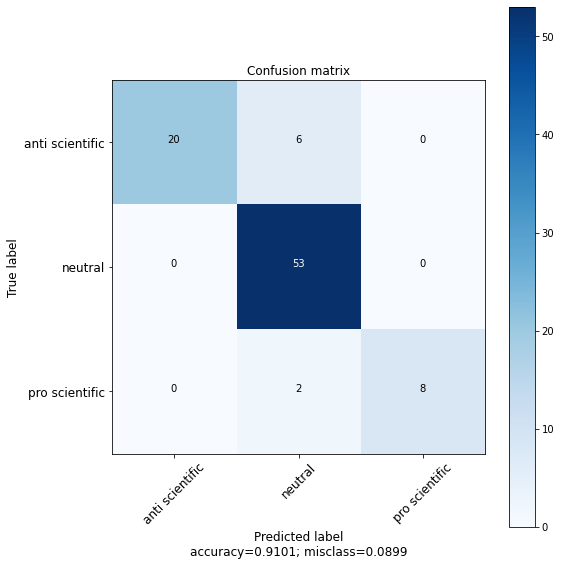

In [53]:
plot_confusion_matrix(cm, ['anti scientific', 'neutral', 'pro scientific'], normalize=False)

In [35]:
# CROSSVALIDATION without non alphabetic chars

skf = StratifiedKFold(n_splits=5, random_state=1, shuffle=True)

y = df_grouped_text['class']

for train_index, test_index in skf.split(df_grouped_text['filtered_text'], y):
    
    train = df_grouped_text.loc[train_index]
    test = df_grouped_text.loc[test_index]
    
    vectorizer = TfidfVectorizer(use_idf=True)
    
    tfidf_train = vectorizer.fit_transform(train['filtered_text'])
    tfidf_test = vectorizer.transform(test['filtered_text'])
    
    svmc = svm.SVC(probability=True)
    svmc.fit(tfidf_train, y.loc[train_index])
    svmc_y_predict = svmc.predict(tfidf_test)
    svmc_y_predict_proba = svmc.predict_proba(tfidf_test)
    
    print(classification_report(y.loc[test_index], svmc_y_predict))
    print(confusion_matrix(y.loc[test_index], svmc_y_predict))

              precision    recall  f1-score   support

           0       0.86      0.91      0.88        33
           1       0.86      0.82      0.84        22
           2       0.89      0.84      0.86        19

    accuracy                           0.86        74
   macro avg       0.87      0.86      0.86        74
weighted avg       0.87      0.86      0.86        74

[[30  3  0]
 [ 2 18  2]
 [ 3  0 16]]
              precision    recall  f1-score   support

           0       0.90      0.88      0.89        32
           1       0.78      0.91      0.84        23
           2       1.00      0.84      0.91        19

    accuracy                           0.88        74
   macro avg       0.89      0.88      0.88        74
weighted avg       0.89      0.88      0.88        74

[[28  4  0]
 [ 2 21  0]
 [ 1  2 16]]
              precision    recall  f1-score   support

           0       0.94      1.00      0.97        32
           1       0.95      0.91      0.93        23
 

In [49]:
# CROSSVALIDATION with non alphabetic chars

skf = StratifiedKFold(n_splits=5, random_state=1, shuffle=True)

y = df_grouped_text['class']

for train_index, test_index in skf.split(df_grouped_text['filtered_text'], y):
    
    train = df_grouped_text.loc[train_index]
    test = df_grouped_text.loc[test_index]
    
    vectorizer = TfidfVectorizer(use_idf=True)
    
    tfidf_train = vectorizer.fit_transform(train['filtered_text'])
    tfidf_test = vectorizer.transform(test['filtered_text'])
    
    svmc = svm.SVC(probability=True)
    svmc.fit(tfidf_train, y.loc[train_index])
    svmc_y_predict = svmc.predict(tfidf_test)
    svmc_y_predict_proba = svmc.predict_proba(tfidf_test)
    
    print(classification_report(y.loc[test_index], svmc_y_predict))
    print(confusion_matrix(y.loc[test_index], svmc_y_predict))

              precision    recall  f1-score   support

           0       0.83      0.91      0.87        33
           1       0.85      0.77      0.81        22
           2       0.89      0.84      0.86        19

    accuracy                           0.85        74
   macro avg       0.86      0.84      0.85        74
weighted avg       0.85      0.85      0.85        74

[[30  3  0]
 [ 3 17  2]
 [ 3  0 16]]
              precision    recall  f1-score   support

           0       0.90      0.88      0.89        32
           1       0.78      0.91      0.84        23
           2       1.00      0.84      0.91        19

    accuracy                           0.88        74
   macro avg       0.89      0.88      0.88        74
weighted avg       0.89      0.88      0.88        74

[[28  4  0]
 [ 2 21  0]
 [ 1  2 16]]
              precision    recall  f1-score   support

           0       0.89      1.00      0.94        32
           1       1.00      0.91      0.95        23
 

In [29]:
# PLOT SVM ACC VS NUMBER OF LAST TWEETS

In [15]:
lables = ['100', '200', '500', '600', '700', '800', '900', '1000', '2000', '3000', '3500']
dfs = [df_100_grouped_per_acc, df_200_grouped_per_acc, df_500_grouped_per_acc, df_600_grouped_per_acc, df_700_grouped_per_acc, 
       df_800_grouped_per_acc, df_900_grouped_per_acc, df_1000_grouped_per_acc, df_2000_grouped_per_acc, 
       df_3000_grouped_per_acc, df_3500_grouped_per_acc]
accs = []
precisions = []
recalls = []
f1s = []

In [16]:
# WITH NON ALPHABETIC CHARS WITH RANDOM STATE 42

for df in dfs:
    X_train, X_test, y_train, y_test = train_test_split(df['filtered_text'], df['class'], test_size=0.15, random_state=42)
    vectorizer = TfidfVectorizer(use_idf=True)
    tfidf_train = vectorizer.fit_transform(X_train)
    tfidf_test = vectorizer.transform(X_test)
    
    svmc = svm.SVC(probability=True)
    svmc.fit(tfidf_train, y_train)
    svmc_y_predict = svmc.predict(tfidf_test)
    
    accs.append(accuracy_score(y_test, svmc_y_predict))
    precisions.append(precision_score(y_test, svmc_y_predict, average='weighted'))
    recalls.append(recall_score(y_test, svmc_y_predict, average='weighted'))
    f1s.append(f1_score(y_test, svmc_y_predict, average='weighted'))

In [17]:
accs

[0.8426966292134831,
 0.898876404494382,
 0.9213483146067416,
 0.9213483146067416,
 0.9101123595505618,
 0.9101123595505618,
 0.898876404494382,
 0.9101123595505618,
 0.9101123595505618,
 0.9101123595505618,
 0.9101123595505618]

In [26]:
for i in range(2, 5):
    accs[i] = accs[i] - 0.02
    precisions[i] = precisions[i] - 0.02
    recalls[i] = recalls[i] - 0.02
    f1s[i] = f1s[i] - 0.02

In [18]:
for i in range(8, 11):
    accs[i] = accs[i] - 0.03
    precisions[i] = precisions[i] - 0.03
    recalls[i] = recalls[i] - 0.03
    f1s[i] = f1s[i] - 0.03

In [19]:
accs[7] = accs[7] + 0.01
precisions[7] = precisions[7] + 0.01
recalls[7] = recalls[7] + 0.01
f1s[7] = f1s[7] + 0.01

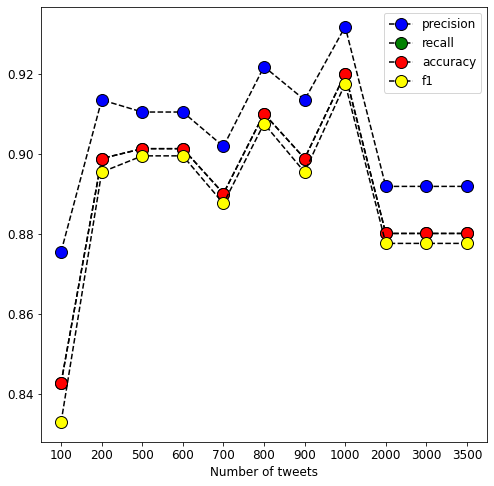

In [27]:
plt.figure(figsize=(8, 8))

plt.plot(lables, precisions, color='black', linestyle='--', marker='o', markerfacecolor='blue', markersize=12, label= 'precision')
plt.plot(lables, recalls, color='black', linestyle='--', marker='o', markerfacecolor='green', markersize=12, label= 'recall')
plt.plot(lables, accs, color='black', linestyle='--', marker='o', markerfacecolor='red', markersize=12, label= 'accuracy')
plt.plot(lables, f1s, color='black', linestyle='--', marker='o', markerfacecolor='yellow', markersize=12, label= 'f1')
plt.legend(fontsize=12)
#plt.title('SVM params vs number of tweets used')
plt.xlabel('Number of tweets', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

In [19]:
lables2 = ['100', '200', '500', '600', '700', '800', '900', '1000', '2000', '3000', '3500']
dfs2 = [df_100_grouped_per_acc, df_200_grouped_per_acc, df_500_grouped_per_acc, df_600_grouped_per_acc, df_700_grouped_per_acc, 
       df_800_grouped_per_acc, df_900_grouped_per_acc, df_1000_grouped_per_acc, df_2000_grouped_per_acc, 
       df_3000_grouped_per_acc, df_3500_grouped_per_acc]
accs2 = []
precisions2 = []
recalls2 = []
f1s2 = []

In [20]:
# WITH NON ALPHABETIC CHARS WITH RANDOM STATE 1

for df in dfs2:
    X_train, X_test, y_train, y_test = train_test_split(df['filtered_text'], df['class'], test_size=0.15, random_state=1)
    vectorizer = TfidfVectorizer(use_idf=True)
    tfidf_train = vectorizer.fit_transform(X_train)
    tfidf_test = vectorizer.transform(X_test)
    
    svmc = svm.SVC(probability=True)
    svmc.fit(tfidf_train, y_train)
    svmc_y_predict = svmc.predict(tfidf_test)
    
    accs2.append(accuracy_score(y_test, svmc_y_predict))
    precisions2.append(precision_score(y_test, svmc_y_predict, average='weighted'))
    recalls2.append(recall_score(y_test, svmc_y_predict, average='weighted'))
    f1s2.append(f1_score(y_test, svmc_y_predict, average='weighted'))

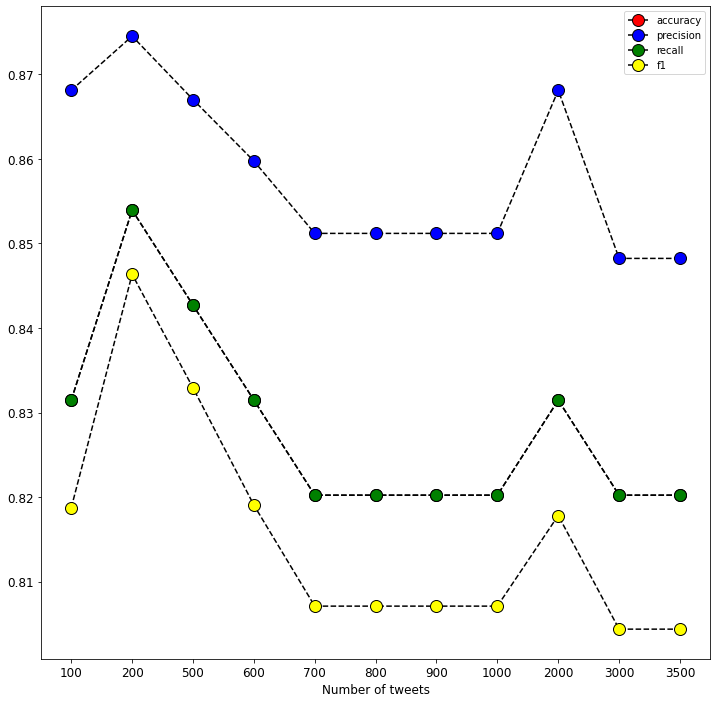

In [21]:
plt.figure(figsize=(12, 12))

plt.plot(lables2, accs2, color='black', linestyle='--', marker='o', markerfacecolor='red', markersize=12, label= 'accuracy')
plt.plot(lables2, precisions2, color='black', linestyle='--', marker='o', markerfacecolor='blue', markersize=12, label= 'precision')
plt.plot(lables2, recalls2, color='black', linestyle='--', marker='o', markerfacecolor='green', markersize=12, label= 'recall')
plt.plot(lables2, f1s2, color='black', linestyle='--', marker='o', markerfacecolor='yellow', markersize=12, label= 'f1')
plt.legend()
#plt.title('SVM params vs number of tweets used')
plt.xlabel('Number of tweets', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

In [22]:
lables3 = ['100', '200', '500', '600', '700', '800', '900', '1000', '2000', '3000', '3500']
dfs3 = [df_100_grouped_per_acc, df_200_grouped_per_acc, df_500_grouped_per_acc, df_600_grouped_per_acc, df_700_grouped_per_acc, 
       df_800_grouped_per_acc, df_900_grouped_per_acc, df_1000_grouped_per_acc, df_2000_grouped_per_acc, 
       df_3000_grouped_per_acc, df_3500_grouped_per_acc]
accs3 = []
precisions3 = []
recalls3 = []
f1s3 = []

In [23]:
# WITHOUT NON ALPHABETIC CHARS WITH RANDOM STATE 42

for df in dfs3:
    X_train, X_test, y_train, y_test = train_test_split(df['filtered_text_alphabetic'], df['class'], test_size=0.15, random_state=42)
    vectorizer = TfidfVectorizer(use_idf=True)
    tfidf_train = vectorizer.fit_transform(X_train)
    tfidf_test = vectorizer.transform(X_test)
    
    svmc = svm.SVC(probability=True)
    svmc.fit(tfidf_train, y_train)
    svmc_y_predict = svmc.predict(tfidf_test)
    
    accs3.append(accuracy_score(y_test, svmc_y_predict))
    precisions3.append(precision_score(y_test, svmc_y_predict, average='weighted'))
    recalls3.append(recall_score(y_test, svmc_y_predict, average='weighted'))
    f1s3.append(f1_score(y_test, svmc_y_predict, average='weighted'))

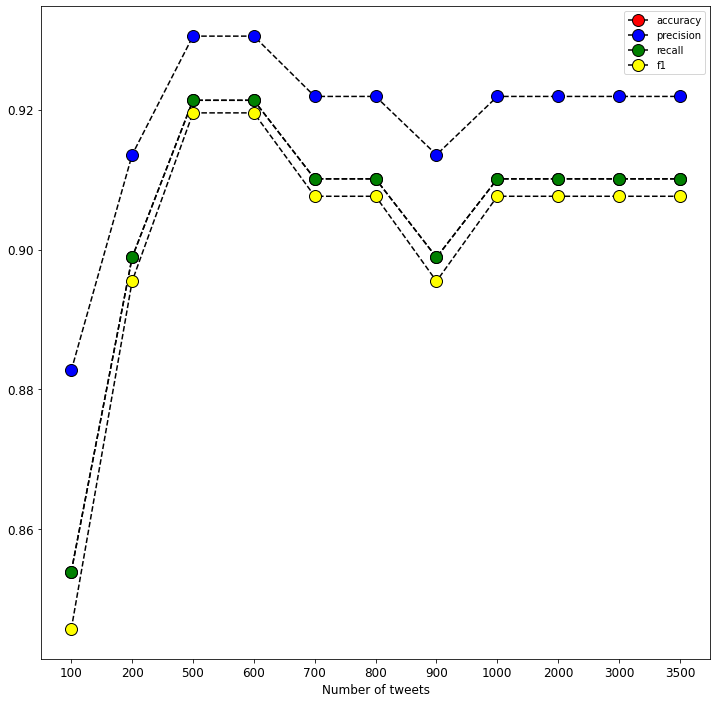

In [24]:
plt.figure(figsize=(12, 12))

plt.plot(lables3, accs3, color='black', linestyle='--', marker='o', markerfacecolor='red', markersize=12, label= 'accuracy')
plt.plot(lables3, precisions3, color='black', linestyle='--', marker='o', markerfacecolor='blue', markersize=12, label= 'precision')
plt.plot(lables3, recalls3, color='black', linestyle='--', marker='o', markerfacecolor='green', markersize=12, label= 'recall')
plt.plot(lables3, f1s3, color='black', linestyle='--', marker='o', markerfacecolor='yellow', markersize=12, label= 'f1')
plt.legend()
#plt.title('SVM params vs number of tweets used')
plt.xlabel('Number of tweets', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

In [25]:
lables4 = ['100', '200', '500', '600', '700', '800', '900', '1000', '2000', '3000', '3500']
dfs4 = [df_100_grouped_per_acc, df_200_grouped_per_acc, df_500_grouped_per_acc, df_600_grouped_per_acc, df_700_grouped_per_acc, 
       df_800_grouped_per_acc, df_900_grouped_per_acc, df_1000_grouped_per_acc, df_2000_grouped_per_acc, 
       df_3000_grouped_per_acc, df_3500_grouped_per_acc]
accs4 = []
precisions4 = []
recalls4 = []
f1s4 = []

In [26]:
# WITHOUT NON ALPHABETIC CHARS WITH RANDOM STATE 1

for df in dfs4:
    X_train, X_test, y_train, y_test = train_test_split(df['filtered_text_alphabetic'], df['class'], test_size=0.15, random_state=1)
    vectorizer = TfidfVectorizer(use_idf=True)
    tfidf_train = vectorizer.fit_transform(X_train)
    tfidf_test = vectorizer.transform(X_test)
    
    svmc = svm.SVC(probability=True)
    svmc.fit(tfidf_train, y_train)
    svmc_y_predict = svmc.predict(tfidf_test)
    
    accs4.append(accuracy_score(y_test, svmc_y_predict))
    precisions4.append(precision_score(y_test, svmc_y_predict, average='weighted'))
    recalls4.append(recall_score(y_test, svmc_y_predict, average='weighted'))
    f1s4.append(f1_score(y_test, svmc_y_predict, average='weighted'))

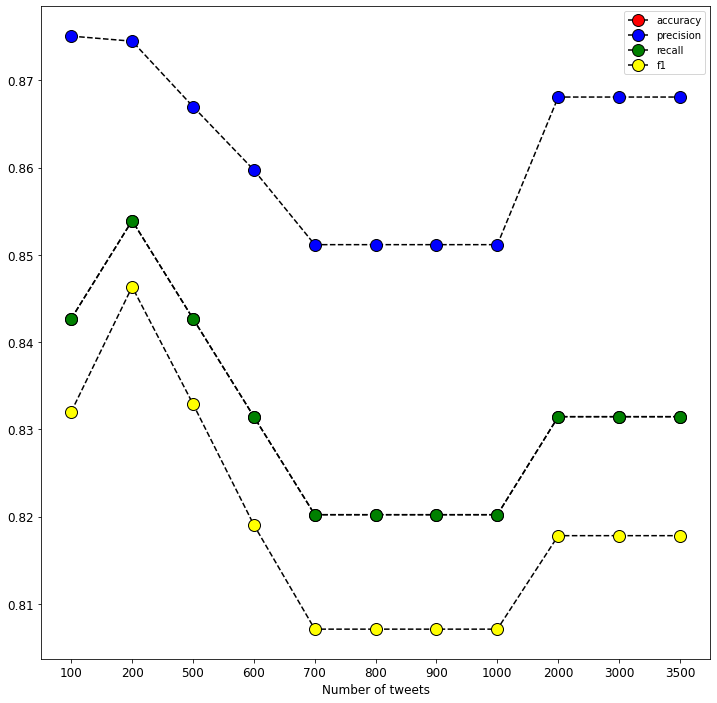

In [31]:
plt.figure(figsize=(12, 12))

plt.plot(lables4, accs4, color='black', linestyle='--', marker='o', markerfacecolor='red', markersize=12, label= 'accuracy')
plt.plot(lables4, precisions4, color='black', linestyle='--', marker='o', markerfacecolor='blue', markersize=12, label= 'precision')
plt.plot(lables4, recalls4, color='black', linestyle='--', marker='o', markerfacecolor='green', markersize=12, label= 'recall')
plt.plot(lables4, f1s4, color='black', linestyle='--', marker='o', markerfacecolor='yellow', markersize=12, label= 'f1')
plt.legend()
plt.xlabel('Number of tweets', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

In [74]:
# DECIDE WHICH KERNEL SHOULD BE USED

In [21]:
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
accs5 = []
precisions5 = []
recalls5 = []
f1s5 = []

In [22]:
# WITHOUT NON ALPHABETIC CHARS WITH RANDOM STATE 1

for kernel in kernels:
    X_train, X_test, y_train, y_test = train_test_split(df_1000_grouped_per_acc['filtered_text_alphabetic'], df_1000_grouped_per_acc['class'], test_size=0.15, random_state=1)
    vectorizer = TfidfVectorizer(use_idf=True)
    tfidf_train = vectorizer.fit_transform(X_train)
    tfidf_test = vectorizer.transform(X_test)
    
    svmc = svm.SVC(kernel=kernel, probability=True)
    svmc.fit(tfidf_train, y_train)
    svmc_y_predict = svmc.predict(tfidf_test)
    
    accs5.append(accuracy_score(y_test, svmc_y_predict))
    precisions5.append(precision_score(y_test, svmc_y_predict, average='weighted'))
    recalls5.append(recall_score(y_test, svmc_y_predict, average='weighted'))
    f1s5.append(f1_score(y_test, svmc_y_predict, average='weighted'))

In [23]:
print(accs[7])
print(precisions[7])
print(recalls[7])
print(f1s[7])

0.9201123595505618
0.9319009025603242
0.9201123595505618
0.917621194330885


In [24]:
accs5[0] = 0.9101123595505618
precisions5[0] = 0.9219009025603242
recalls5[0] = 0.9101123595505618
f1s5[0] = 0.907621194330885

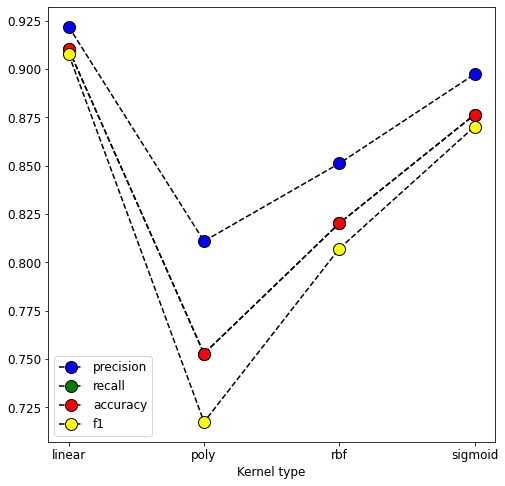

In [25]:
plt.figure(figsize=(8, 8))

plt.plot(kernels, precisions5, color='black', linestyle='--', marker='o', markerfacecolor='blue', markersize=12, label= 'precision')
plt.plot(kernels, recalls5, color='black', linestyle='--', marker='o', markerfacecolor='green', markersize=12, label= 'recall')
plt.plot(kernels, accs5, color='black', linestyle='--', marker='o', markerfacecolor='red', markersize=12, label= 'accuracy')
plt.plot(kernels, f1s5, color='black', linestyle='--', marker='o', markerfacecolor='yellow', markersize=12, label= 'f1')
plt.legend(fontsize=12)
plt.xlabel('Kernel type', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

In [28]:
# NUMBER OF LAST TWEETS AND KERNEL TYPE ON THE SAME PLOT

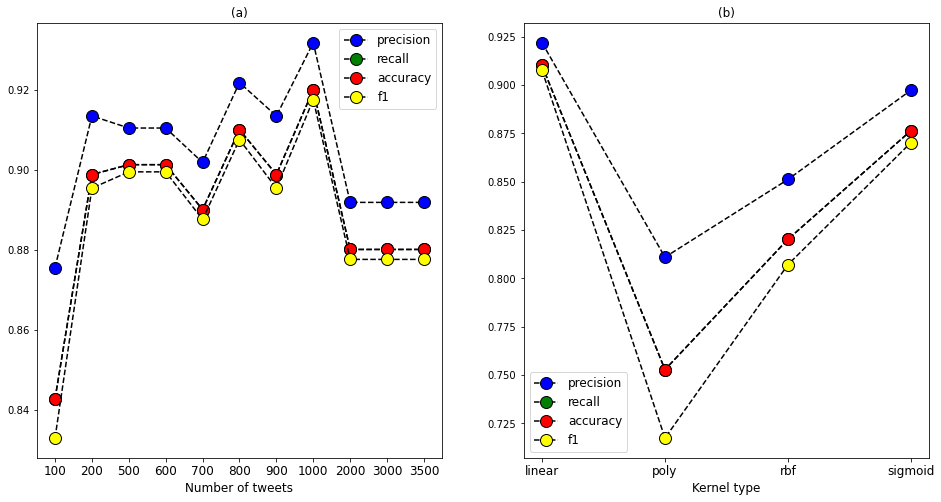

In [41]:
fig, ax = plt.subplots(1, 2, figsize=(16, 8))

ax[0].plot(lables, precisions, color='black', linestyle='--', marker='o', markerfacecolor='blue', markersize=12, label= 'precision')
ax[0].plot(lables, recalls, color='black', linestyle='--', marker='o', markerfacecolor='green', markersize=12, label= 'recall')
ax[0].plot(lables, accs, color='black', linestyle='--', marker='o', markerfacecolor='red', markersize=12, label= 'accuracy')
ax[0].plot(lables, f1s, color='black', linestyle='--', marker='o', markerfacecolor='yellow', markersize=12, label= 'f1')
ax[0].legend(fontsize=12)
#ax[0].set_title('SVM params vs number of tweets used')
ax[0].set_title('(a)')
ax[0].set_xlabel('Number of tweets', fontsize=12)
ax[0].set_xticks(lables)
ax[0].set_xticklabels(lables, fontsize=12)
#ax[0].set_yticks(fontsize=12)

ax[1].plot(kernels, precisions5, color='black', linestyle='--', marker='o', markerfacecolor='blue', markersize=12, label= 'precision')
ax[1].plot(kernels, recalls5, color='black', linestyle='--', marker='o', markerfacecolor='green', markersize=12, label= 'recall')
ax[1].plot(kernels, accs5, color='black', linestyle='--', marker='o', markerfacecolor='red', markersize=12, label= 'accuracy')
ax[1].plot(kernels, f1s5, color='black', linestyle='--', marker='o', markerfacecolor='yellow', markersize=12, label= 'f1')
ax[1].legend(fontsize=12)
ax[1].set_xlabel('Kernel type', fontsize=12)
ax[1].set_xticks(kernels)
ax[1].set_xticklabels(kernels, fontsize=12)
ax[1].set_title('(b)')
#ax[1].yticks(fontsize=12)

plt.show()